# This notebook aggregates all the data that was collected on the multicategory image dataset. This includes the working memory, same day and 24 hours experiments. 

## First, we aggregate all the working memroy batches together to show the final results. 
## Then we combine all the time gaps together for plotting and statistics 

In [1019]:
import pandas as pd 
import numpy as np 
import pathlib as path
import matplotlib.pyplot as plt
import random
from PIL import Image
from random import sample
import statsmodels.api as sm
import os
from scipy.stats import binomtest
import scipy.stats as stats
import seaborn as sns


# Set the display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Disable wrapping to multiple lines


### Define paths 

In [1020]:
project_name='multicategory_working_memory'
experiment_name='experiment 1'
qualification_method='loose' #or 'loose' or #'none' (will take the entire sample of participants that we have values for)

PATH_TO_BATCH=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'collected data' 
PATH_TO_PROJECT=path.Path.cwd().parent.parent.parent / 'projects' / project_name 
PATH_TO_EXPERIMENT=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name
PATH_TO_OUTPUTS=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'figures and outputs' 
PATH_TO_LONG_TERM_MEMORY = path.Path.cwd().parent.parent.parent / 'projects' / 'multicategory' 
if PATH_TO_BATCH.exists():
    print('batch folder found at:\n' ,PATH_TO_BATCH)
else: 
    print('path to batch is non existent:\n',PATH_TO_BATCH)

batch folder found at:
 /Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data


### This is the color pallete for the figures we use 

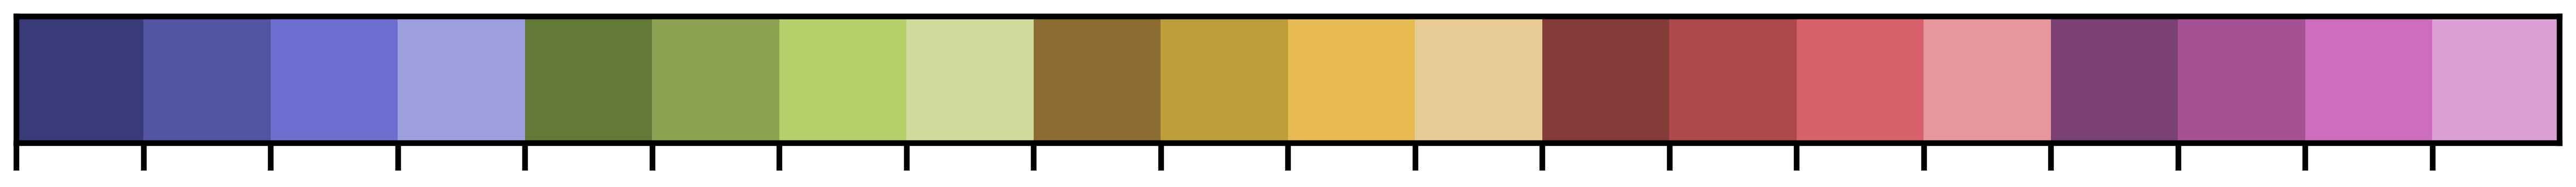

In [1021]:
params = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 36,
    'axes.labelsize': 40,
    'axes.titlesize': 40,
    'xtick.labelsize': 36,
    'ytick.labelsize': 36,
    'legend.fontsize': 40,
    'lines.linewidth': 4,
    'figure.figsize': (30, 30),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'svg',
    'savefig.bbox': 'tight'
}
plt.rcParams.update(params)

# Set Seaborn parameters
sns.set_context("poster", font_scale=1.0)
sns.set_palette('tab20b')

# Plot the color palette
sns.palplot(sns.color_palette())

# Choose a color from the palette
my_color = sns.color_palette()[2]

# Show the plot
plt.show()

### Check what is the operating system - this changes the backspace orientation 

In [1022]:
import sys
import os

if sys.platform.startswith('darwin'):
    # macOS
    separator = '/'
elif sys.platform.startswith('win'):
    # Windows
    separator = '\\'
else:
    # Linux, Unix, or other
    separator = '/'
    
all_directories_paths_working_memory = [x[0] for x in os.walk(PATH_TO_BATCH) if ('batch' in x[0].split(separator)[-1]) and ('data'  not in x[0].split(separator)[-1])]
all_directories_paths_working_memory

['/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 4',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 3',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 2']

# Working memory 

### Load all the working memory data 

In [1023]:

if qualification_method=='none':
    filename = 'one_line_per_participant_all_info_all_subject_strict.csv' #note that why i do use the "strict" its irrelevant as all_subjects includes all of th em and not just qualified so criterion is irrelevant for this line
elif qualification_method in ['strict','loose']:
    filename = 'one_line_per_participant_all_info_valid_subjects_only_'+qualification_method+'.csv'
else: 
    raise Exception(f'the qualification method choosen {qualification_method} is invalid')

all_valid_subjects_working_memory = pd.DataFrame([])
for batch in all_directories_paths_working_memory:
    time_gap = 'working_memory'
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects_working_memory = pd.concat([all_valid_subjects_working_memory,file])

In [1024]:
print(f'there are {len(all_valid_subjects_working_memory.index) - len(set(all_valid_subjects_working_memory.index))}, duplicate subjects')

there are 0, duplicate subjects


In [1025]:
def add_connecting_lines_to_stripplot(stripplot_handle,ax):
  #get the current offsets:
  paths = stripplot_handle.collections
  #get x offsets:
  x_offsets = [path.get_offsets()[:,0] for path in paths]
  x_offsets_arrays=[np.array(offsets) for offsets in x_offsets]
  #get y offsets:
  y_offsets = [path.get_offsets()[:,1] for path in paths]
  y_offsets_arrays=[np.array(offsets) for offsets in y_offsets]
  # Connect each pair of points from the same row with a line
  for bar_ind in np.arange(0,len(x_offsets_arrays)-1):
    for i in range(len(x_offsets_arrays[0])):
      ax.plot([x_offsets_arrays[bar_ind][i], x_offsets_arrays[bar_ind+1][i]], [y_offsets_arrays[bar_ind][i], y_offsets_arrays[bar_ind+1][i]], color="gray", alpha=0.75)

/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


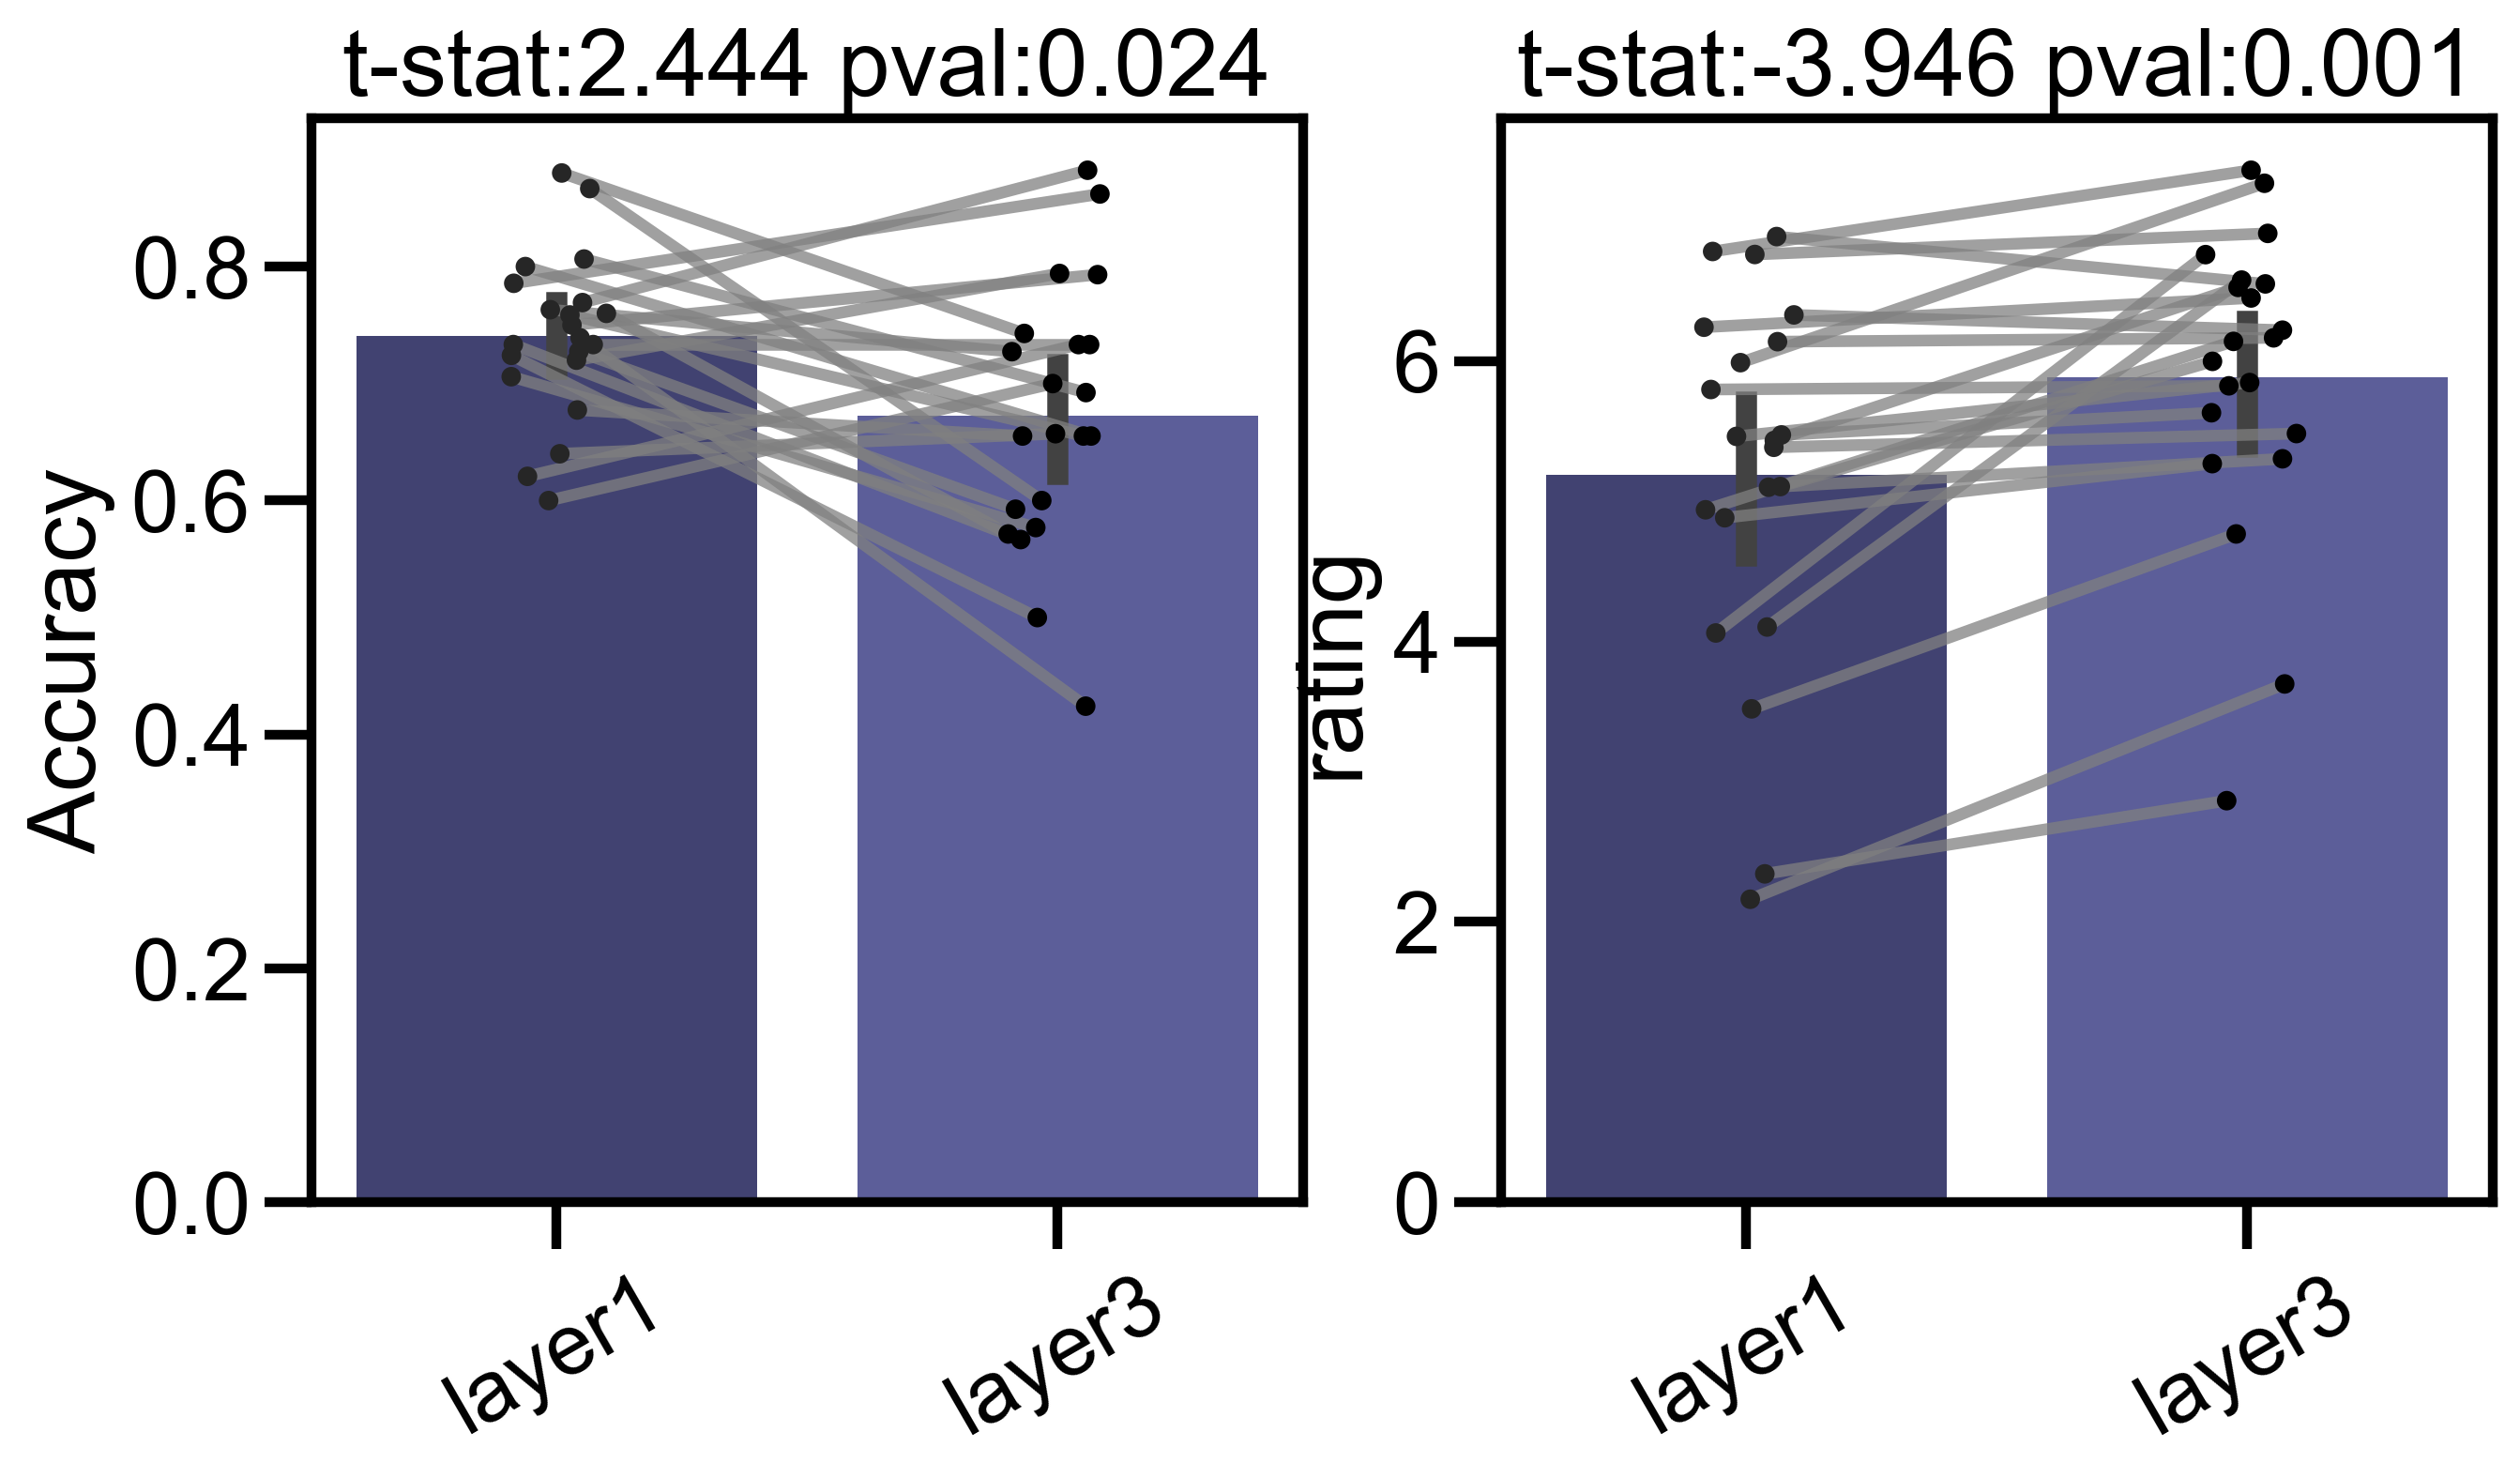

In [1026]:

d1 = all_valid_subjects_working_memory['level_1_accuracy']
d2 = all_valid_subjects_working_memory['level_3_accuracy']
t_stat, p_value = stats.ttest_rel(d1, d2)


fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=all_valid_subjects_working_memory[['level_1_accuracy','level_3_accuracy']],ax=axes[0])
handel1 = sns.stripplot(data=all_valid_subjects_working_memory[['level_1_accuracy','level_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')
axes[0].set_title(f't-stat:{t_stat:.3f} pval:{p_value:.3f}')

sns.barplot(data=all_valid_subjects_working_memory[['level_1_rating','level_3_rating']],ax = axes[1])
handel2 = sns.stripplot(data=all_valid_subjects_working_memory[['level_1_rating','level_3_rating']],color='k',ax = axes[1])


d1 = all_valid_subjects_working_memory['level_1_rating']
d2 = all_valid_subjects_working_memory['level_3_rating']
t_stat, p_value = stats.ttest_rel(d1, d2)

axes[1].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[1].set_ylabel('rating')
axes[1].set_title(f't-stat:{t_stat:.3f} pval:{p_value:.3f}')


add_connecting_lines_to_stripplot(handel1,axes[0])
add_connecting_lines_to_stripplot(handel2,axes[1])

In [1027]:
all_valid_subjects_working_memory['worker_ID'] = all_valid_subjects_working_memory.index
rt_df = pd.melt(all_valid_subjects_working_memory,id_vars=['worker_ID'],value_vars=['level_1_rt','level_3_rt'],var_name='layer')
accuracy_df = pd.melt(all_valid_subjects_working_memory,id_vars=['worker_ID'],value_vars=['level_1_accuracy','level_3_accuracy'],var_name='layer')

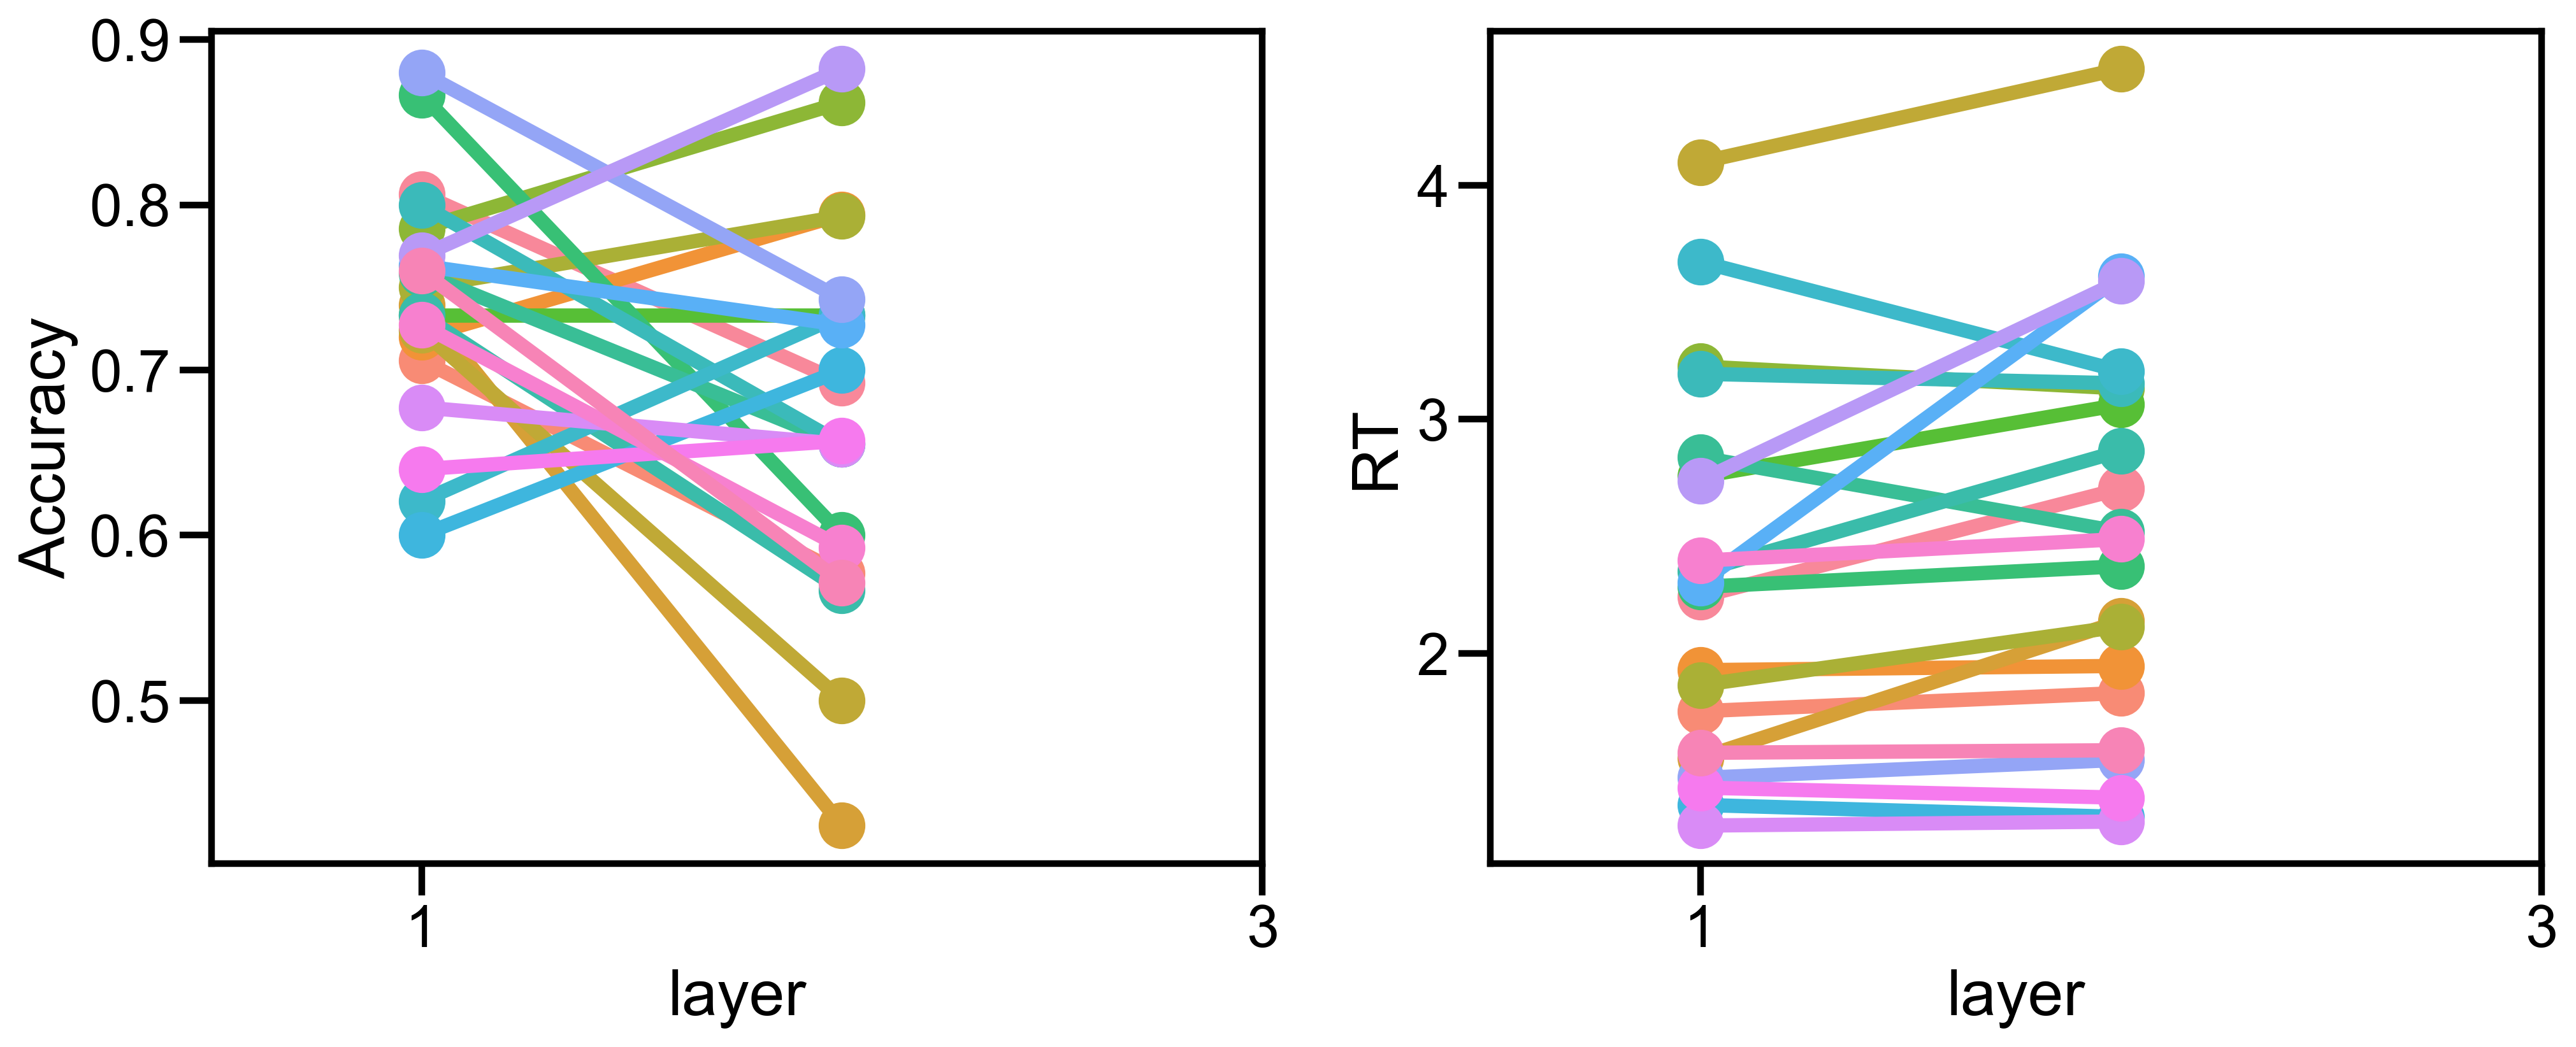

In [1028]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6),sharex=True,sharey=False)
#accuracy: 
G = sns.pointplot(data=accuracy_df,x='layer', y='value', hue='worker_ID', ax=axes[0])
plt.xticks([0,2],['1','3'])
axes[0].set_ylabel('Accuracy')
axes[0].get_legend().remove() 

#rt: 
sns.pointplot(data=rt_df,x='layer', y='value', hue='worker_ID', ax=axes[1])
plt.xticks([0,2],['1','3'])
plt.ylabel('RT')
axes[1].get_legend().remove() 
plt.tight_layout()

# All time gaps 

## concatanate the working memory data with the same day and 24 hours data

In [1029]:
PATH_TO_NON_WORKING_MEMORY_TIME_GAPS =path.Path.cwd().parent.parent.parent / 'projects' / 'multicategory' / 'experiment 1' 
all_directories_paths_long_term_memory = [x[0] for x in os.walk(PATH_TO_NON_WORKING_MEMORY_TIME_GAPS) if ('batch' in x[0].split(separator)[-1]) and ('data'  not in x[0].split(separator)[-1])]
all_directories_paths_long_term_memory

['/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 2',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 3',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 2']

In [1030]:
if qualification_method=='none':
    filename = 'one_line_per_participant_all_info_all_subject_strict.csv' #note that why i do use the "strict" its irrelevant as all_subjects includes all of th em and not just qualified so criterion is irrelevant for this line
elif qualification_method in ['strict','loose']:
    filename = 'one_line_per_participant_all_info_valid_subjects_only_'+qualification_method+'.csv'
else: 
    raise Exception(f'the qualification method choosen {qualification_method} is invalid')

all_valid_subjects_non_working_memory = pd.DataFrame([])
for batch in all_directories_paths_long_term_memory:
    time_gap = path.Path(batch).parent.name
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects_non_working_memory = pd.concat([all_valid_subjects_non_working_memory,file])

In [1031]:
n_24_hours= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_same_day']

all_valid_subjects_non_working_memory['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    42
Name: count, dtype: int64

## remove duplicate subjects in same day / 24 hours 

In [1032]:
print(f'there are {len(all_valid_subjects_non_working_memory.index) - len(set(all_valid_subjects_non_working_memory.index))}, duplicate subjects')

there are 2, duplicate subjects


In [1033]:
all_valid_subjects_non_working_memory.index.value_counts()

AEK2SAEL9GG39     2
A39KMTFHRJJASK    2
A2UWEAIX8UZXAQ    1
AW07POT8ABE05     1
AC01SVLHOB6HN     1
                 ..
A394S7JSNUA3TS    1
AZNIEFUIVB2H0     1
A1VXAJIELTYK0     1
A3CGQOJC28OVGN    1
A2J9NFY45NKR2N    1
Name: count, Length: 84, dtype: int64

In [1034]:
all_valid_subjects_non_working_memory = all_valid_subjects_non_working_memory[~((all_valid_subjects_non_working_memory['worker_ID'] == 'AEK2SAEL9GG39') & (all_valid_subjects_non_working_memory['time_gap'] == 'pilot_24_hours')) ]
all_valid_subjects_non_working_memory = all_valid_subjects_non_working_memory[~((all_valid_subjects_non_working_memory['worker_ID'] == 'A39KMTFHRJJASK') & (all_valid_subjects_non_working_memory['time_gap'] == 'pilot_24_hours')) ]

In [1035]:
n_24_hours= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_same_day']
all_valid_subjects_non_working_memory['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    40
Name: count, dtype: int64

## concatanate data from working memroy and previous time gaps 

In [1036]:
long_term_memory_cols = {'testing_layer_1_accuracy':'level_1_accuracy',
                         'testing_layer_1_rt':'level_1_rt',
                         'testing_layer_1_rating':'level_1_rating', 

                         'testing_layer_3_accuracy':'level_3_accuracy',
                         'testing_layer_3_rt':'level_3_rt',
                         'testing_layer_3_rating':'level_3_rating', 

                         'testing_longest_response_strike':'longest_response_strike',
                         'testing_rating_mean':'rating_mean',
                         'testing_rating_varience': 'rating_varience',
                         'testing_RT_overall_mean': 'RT_overall_mean',
                         'testing_Test_overall_accuracy':'Test_overall_accuracy'


                         }

all_valid_subjects_non_working_memory.rename(columns=long_term_memory_cols,inplace=True)
all_valid_subjects_non_working_memory

demo_arrow_rt  demo_arrow_correct  demo_demo_accuracy  demo_RT_overall_mean  demo_rating_varience  demo_RT_incorrect_mean  demo_RT_correct_mean  encoding_arrow_mean_rt  encoding_arrow_accuracy  Test_overall_accuracy  RT_overall_mean  rating_varience  rating_mean  level_1_rating  level_3_rating  testing_RT_incorrect_mean  testing_RT_correct_mean  level_1_rt  level_1_accuracy  level_3_rt  level_3_accuracy  longest_response_strike        time_gap       worker_ID  batch_number
A17K1CHOI773VZ         1.3138                 1.0            0.666667              3.189917              1.834848                2.376300              3.596725                 1.34020                      1.0               0.733333         5.368782         2.045803     4.466667        4.033333        4.900000                   7.745687                 4.504452    4.506480          0.833333    6.231083          0.633333                      4.0  pilot_same_day  A17K1CHOI773VZ             1
AMHUDJ44HF1ZH          0.7300                 1.0            0.500000              2.712833              4.381780                2.982133              2.443533                 0.69402                      1.0               0.816667         2.433175         1.806767     6.700000        6.033333        7.366667                   2.643782                 2.385896    2.360230          0.733333    2.506120          0.900000                      4.0  pilot_same_day   AMHUDJ44HF1ZH             1
AGOBQY50VQ7VX          1.1111                 1.0            0.500000              3.341400              0.516398                1.598633              5.084167                 1.04190                      1.0               0.816667         2.228652         1.676019     6.733333        6.733333        6.733333                   2.623264                 2.140065    2.084323          0.833333    2.372980          0.800000                      6.0  pilot_same_day   AGOBQY50VQ7VX             1
A23J0G72AUTS1I         1.3290                 1.0            0.333333             12.004650              2.338090               16.544175              2.925600                 1.05904                      1.0               0.783333         2.873752         1.619444     6.433333        6.666667        6.200000                   2.319831                 3.026964    2.111473          0.900000    3.636030          0.666667                      3.0  pilot_same_day  A23J0G72AUTS1I             1
ATPW1MWLW7RBL          1.0961                 1.0            1.000000              2.207467              1.471960                     NaN              2.207467                 1.20210                      1.0               0.800000         1.833232         1.904500     6.000000        5.966667        6.033333                   1.952917                 1.803310    1.759800          0.833333    1.906663          0.766667                      9.0  pilot_same_day   ATPW1MWLW7RBL             1
...                       ...                 ...                 ...                   ...                   ...                     ...                   ...                     ...                      ...                    ...              ...              ...          ...             ...             ...                        ...                      ...         ...               ...         ...               ...                      ...             ...             ...           ...
A2F48NO7AD9VKK         0.6011                 1.0            0.333333              3.500517              0.408248                4.163150              2.175250                 0.54320                      1.0               0.716667         3.422595         1.511818     3.550000        3.366667        3.733333                   3.469447                 3.404072    3.646127          0.633333    3.199063          0.800000                      5.0  pilot_24_hours  A2F48NO7AD9VKK             2
A19AYB3M3IIP51         1.7267                 1.0            0.5

In [1037]:
all_subjects_working_memory_and_time_gaps = pd.concat([all_valid_subjects_non_working_memory,all_valid_subjects_working_memory])

# remove duplicate values working memory - long term memory 

In [1038]:
all_subjects_working_memory_and_time_gaps['worker_ID'].value_counts()

worker_ID
ANDJL5986AUAF     2
A3V2XCDF45VN9X    2
A17K1CHOI773VZ    1
A237PUN7791D62    1
A2NC28XJKAFJV     1
                 ..
A2GE831IS8US6K    1
A39KMTFHRJJASK    1
A13WTEQ06V3B6D    1
A3E8SXH0BAYG85    1
A3VVCPYZROGGJZ    1
Name: count, Length: 103, dtype: int64

In [1039]:
all_subjects_working_memory_and_time_gaps[all_subjects_working_memory_and_time_gaps['worker_ID']== 'A3V2XCDF45VN9X']

demo_arrow_rt  demo_arrow_correct  demo_demo_accuracy  demo_RT_overall_mean  demo_rating_varience  demo_RT_incorrect_mean  demo_RT_correct_mean  encoding_arrow_mean_rt  encoding_arrow_accuracy  Test_overall_accuracy  RT_overall_mean  rating_varience  rating_mean  level_1_rating  level_3_rating  testing_RT_incorrect_mean  testing_RT_correct_mean  level_1_rt  level_1_accuracy  level_3_rt  level_3_accuracy  longest_response_strike        time_gap       worker_ID  batch_number         subject
A3V2XCDF45VN9X         0.8996                 1.0            0.333333                2.1056              1.095445                 2.19165                1.9335                 1.04252                      1.0               0.683333         1.666748         1.653194     4.250000        4.100000        4.400000                     1.5794                 1.707227    1.662333          0.766667    1.671163               0.6                      5.0  pilot_same_day  A3V2XCDF45VN9X             2             NaN
A3V2XCDF45VN9X            NaN                 NaN            1.000000                2.0987                   NaN                     NaN                   NaN                     NaN                      NaN               0.650000         1.326462         1.336270     5.201136        5.099822        5.302451                        NaN                      NaN    1.352210          0.600000    1.300713               0.7                      3.0  working_memory  A3V2XCDF45VN9X             3  A3V2XCDF45VN9X

In [1040]:
all_subjects_working_memory_and_time_gaps = all_subjects_working_memory_and_time_gaps[~((all_subjects_working_memory_and_time_gaps['worker_ID'] == 'ANDJL5986AUAF') & (all_subjects_working_memory_and_time_gaps['time_gap'] == 'working_memory')) ]
all_subjects_working_memory_and_time_gaps = all_subjects_working_memory_and_time_gaps[~((all_subjects_working_memory_and_time_gaps['worker_ID'] == 'A3V2XCDF45VN9X') & (all_subjects_working_memory_and_time_gaps['time_gap'] == 'working_memory')) ]

In [1041]:
n_24_hours= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['pilot_same_day']
n_working_memory= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['working_memory']


all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    40
working_memory    19
Name: count, dtype: int64

# renaming columns to concatenate all time gaps 

In [1042]:
renameing_dict = {'level_1_rating':'low_level_rating',
            'level_3_rating':'high_level_rating',
            'level_1_accuracy':'low_level_accuracy',
            'level_3_accuracy':'high_level_accuracy',
            'level_1_rt':'low_level_rt',
            'level_3_rt':'high_level_rt',
            'testing_RT_correct_mean':'RT_correct_mean',
            'testing_RT_incorrect_mean':'RT_incorrect_mean',
            'Test_overall_accuracy' : 'overall_accuracy'
}
all_subjects_working_memory_and_time_gaps.rename(columns=renameing_dict,inplace=True)

In [1043]:
all_subjects_working_memory_and_time_gaps.to_csv(PATH_TO_EXPERIMENT / ('all_data_working_memory_and_long_term_'+qualification_method+' .csv'),index=False,)

In [1044]:
#create long format dataframes for accuracy and rt seperately
rt_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_rt','high_level_rt'],var_name='layer')
accuracy_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_accuracy','high_level_accuracy'],var_name='layer')
rating_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_rating','high_level_rating'],var_name='layer')

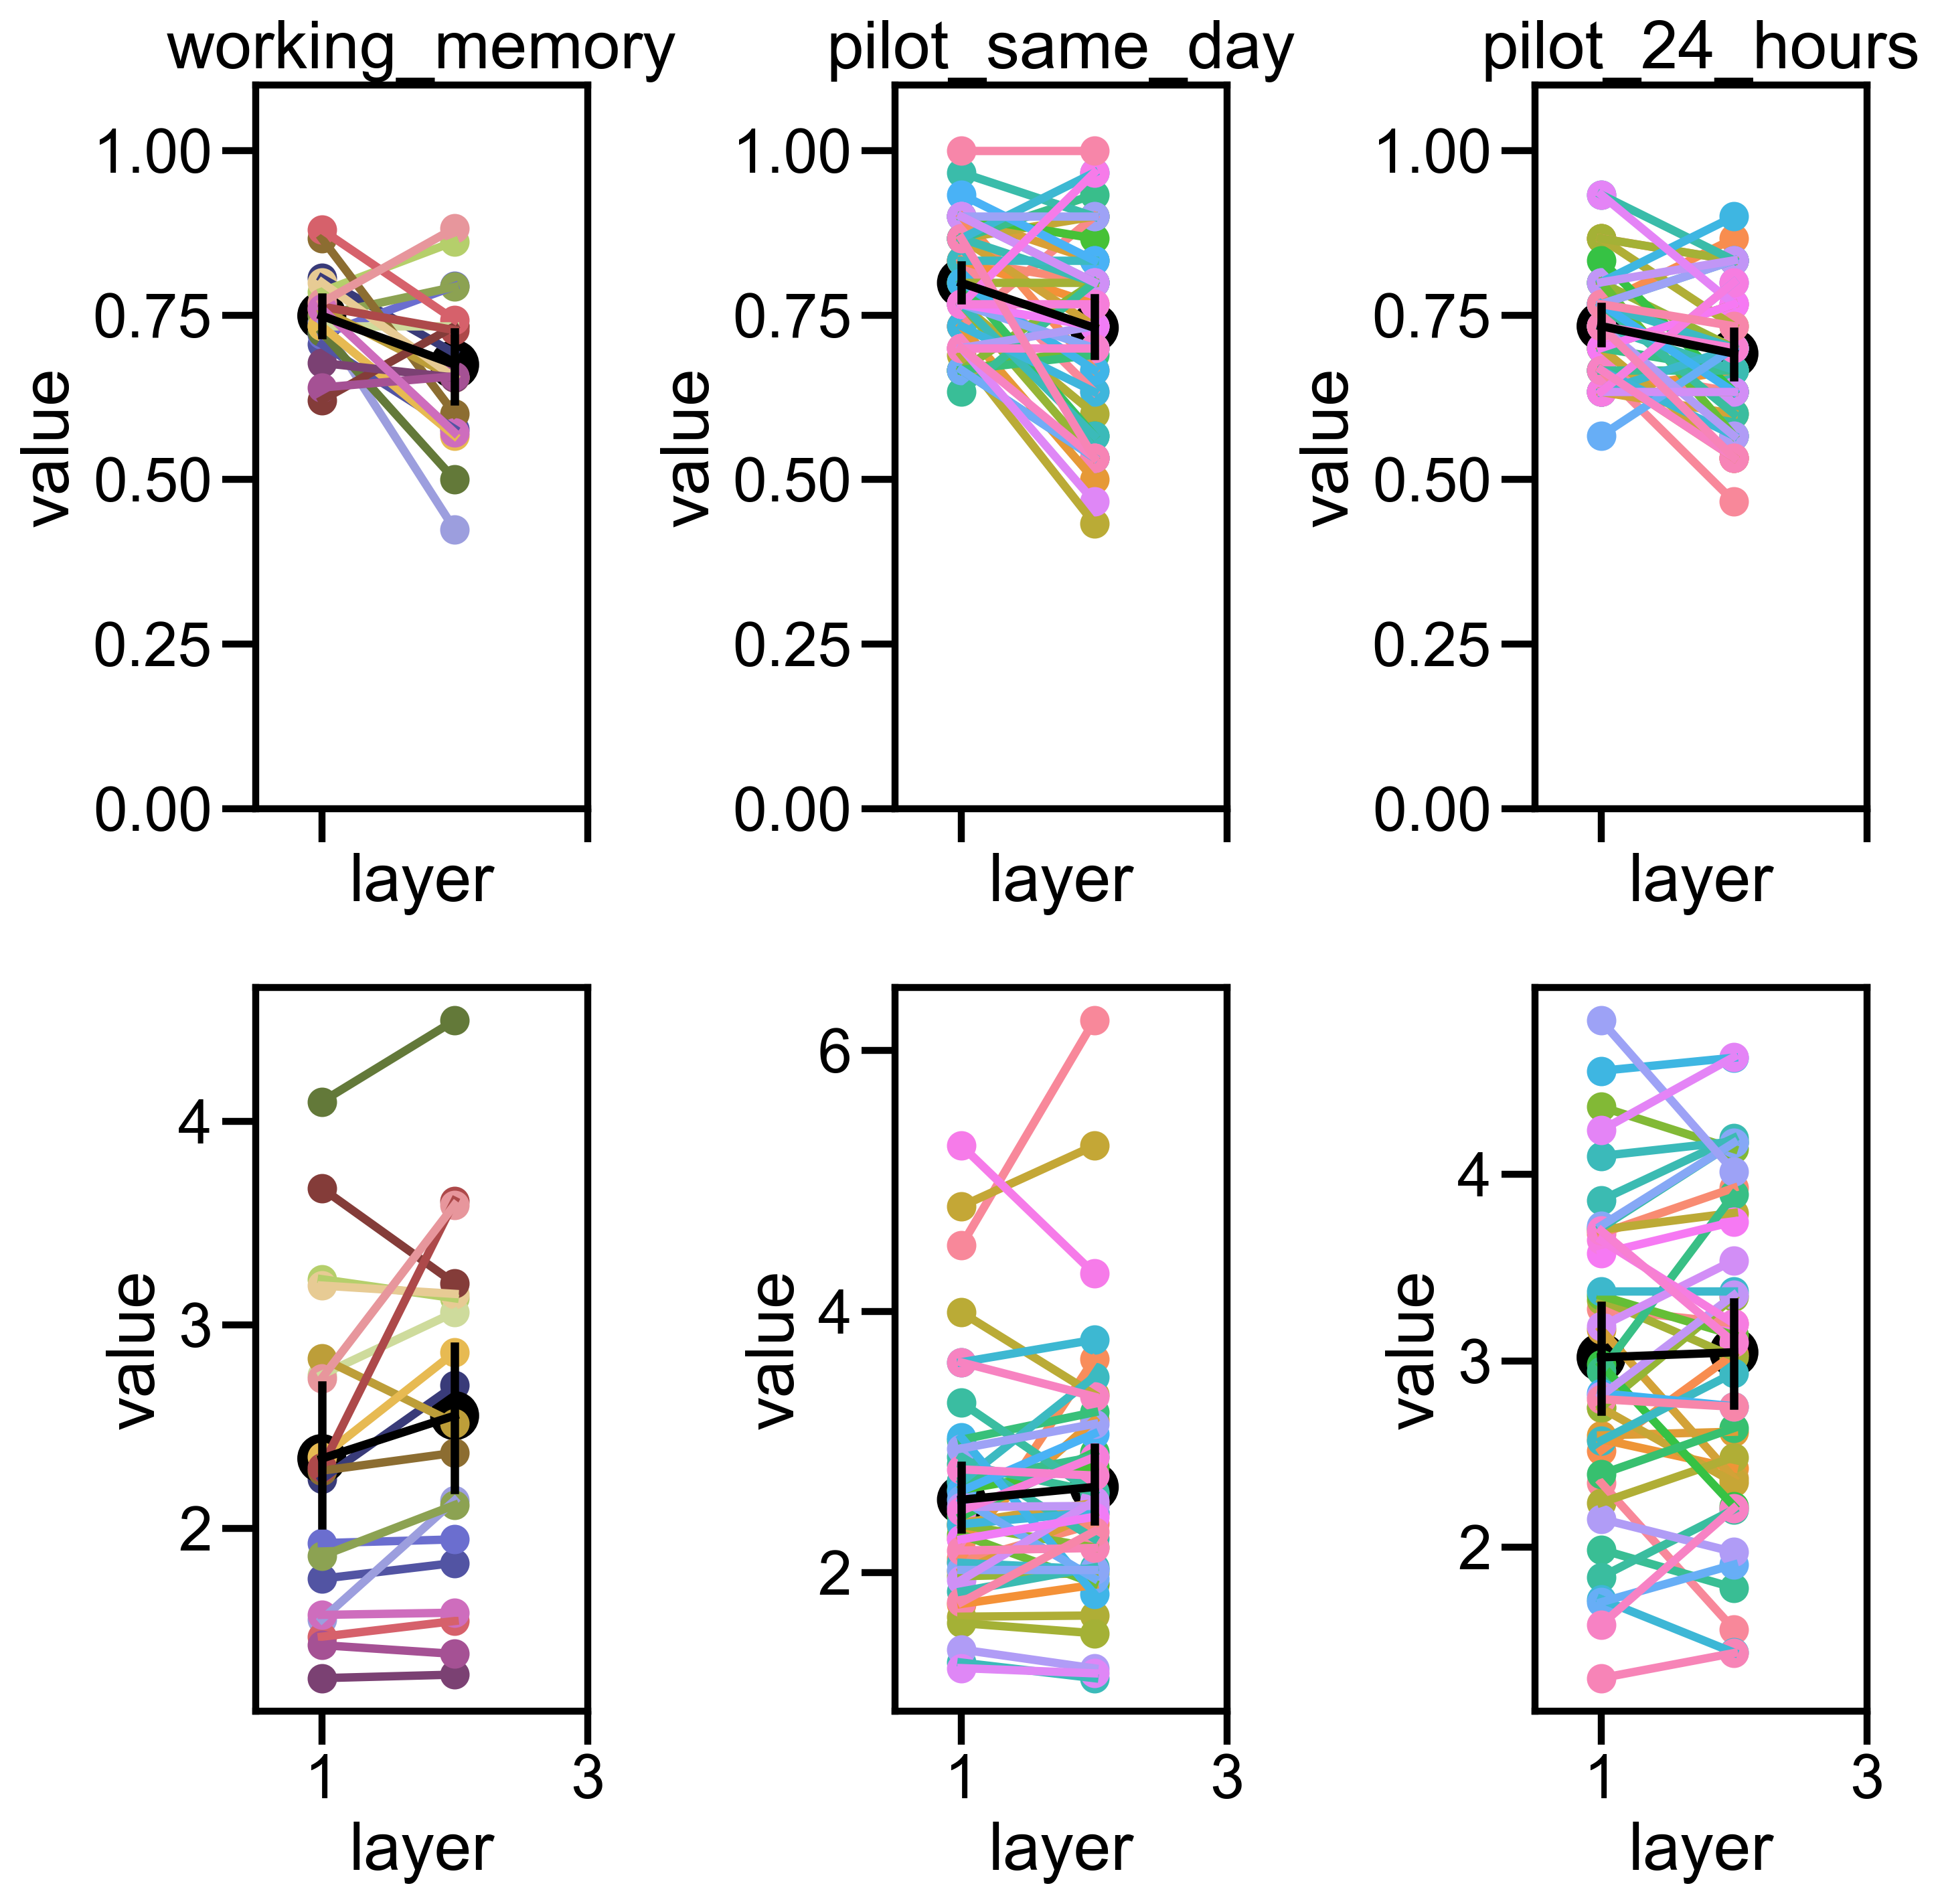

In [1045]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,10),sharex=True,sharey=False)
my_order = ['working_memory','pilot_same_day','pilot_24_hours']
for i,curtime in enumerate(my_order):
    #accuracy: 
    g=sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[0,i], scale = 0.6)
    plt.setp(axes[0,i].lines, zorder=100, linewidth=3)
    axes[0,i].set_ylim([0,1.1])
    sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value',ax=axes[0,i],color='black',scale=1)
    plt.setp(axes[0,i].lines, zorder=200, linewidth=3)
    axes[0,i].get_legend().remove() 
    axes[0,i].set_title(curtime)
    #rt: 
    g=sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[1,i], scale = 0.6)
    plt.setp(axes[1,i].lines, zorder=100, linewidth=3)
    sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value',ax=axes[1,i],color='black',scale=1)
    plt.setp(axes[1,i].lines, zorder=200, linewidth=3)
    plt.xticks([0,2],['1','3'])
    axes[1,i].get_legend().remove()

plt.tight_layout()
fig.savefig(PATH_TO_EXPERIMENT / ('line_graphs_per_condition_in_seperate_subplots_'+qualification_method+'.svg'))


In [1046]:
def add_connecting_lines_to_stripplot(stripplot_handle,ax):
  #get the current offsets:
  paths = stripplot_handle.collections
  #get x offsets:
  x_offsets = [path.get_offsets()[:,0] for path in paths if len(path.get_offsets()[:,0])>0]
  x_offsets_arrays=[np.array(offsets) for offsets in x_offsets]
  #get y offsets:
  y_offsets = [path.get_offsets()[:,1] for path in paths  if len(path.get_offsets()[:,1])>0]
  y_offsets_arrays=[np.array(offsets) for offsets in y_offsets ]
  # Connect each pair of points from the same row with a line
  for i in range(len(x_offsets_arrays[0])):
    ax.plot([x_offsets_arrays[0][i], x_offsets_arrays[0+1][i]], [y_offsets_arrays[0][i], y_offsets_arrays[0+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

  for i in range(len(x_offsets_arrays[2])):
    ax.plot([x_offsets_arrays[2][i], x_offsets_arrays[2+1][i]], [y_offsets_arrays[2][i], y_offsets_arrays[2+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

  # this is an additions for when there are 3 bars to plot (3 time gaps) 3 bars with 2 subbars 
  if len(x_offsets_arrays) == 6:
    for i in range(len(x_offsets_arrays[4])):
      ax.plot([x_offsets_arrays[4][i], x_offsets_arrays[4+1][i]], [y_offsets_arrays[4][i], y_offsets_arrays[4+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

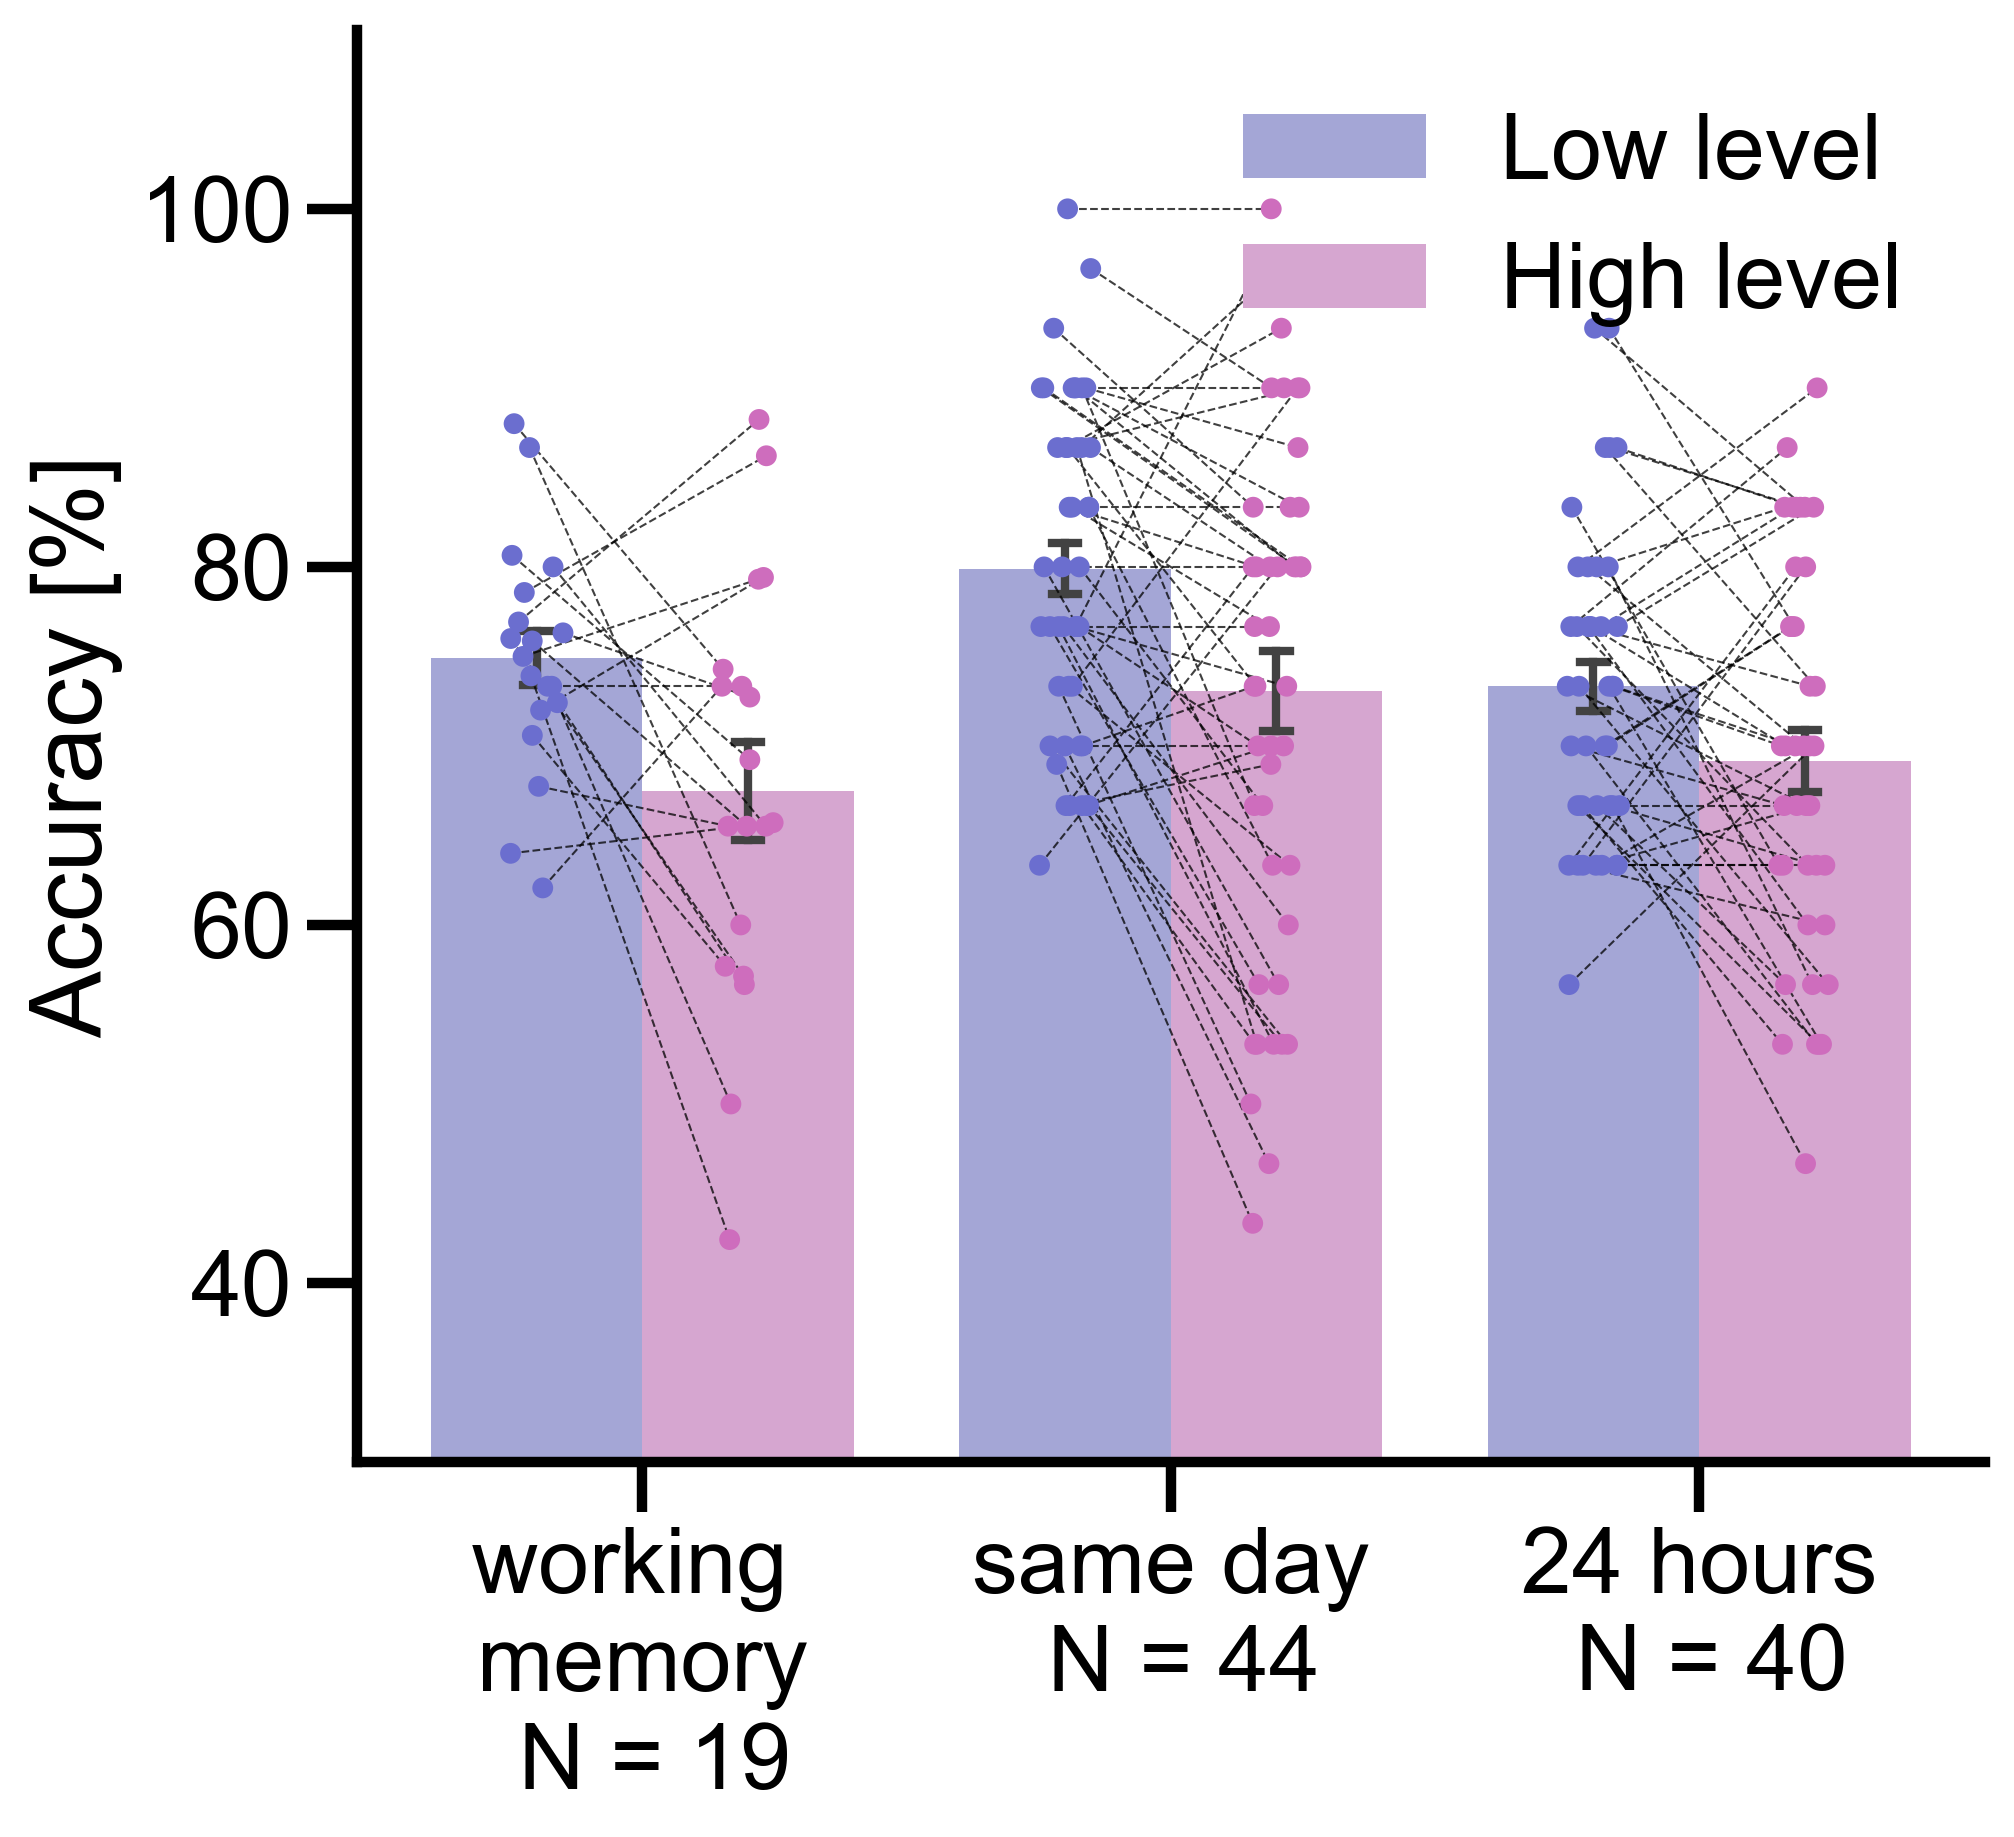

In [1047]:
#code for figures:
my_order = ['low_level_accuracy','high_level_accuracy']

if accuracy_df['value'].mean()<1:
    accuracy_df['value']=accuracy_df['value']*100

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(7,6.2),gridspec_kw = {'wspace':0.2, 'hspace':0})

bar = sns.barplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes,palette=[sns.color_palette()[3],sns.color_palette()[-1]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'],errorbar='se', capsize=.05,errwidth=2)
stripplot=sns.stripplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes,dodge=True,palette=[sns.color_palette()[2],sns.color_palette()[-2]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'])

# Hide the right and top spines
axes.spines[['right', 'top']].set_visible(False)

# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
axes.set_xlabel('')
axes.set_xticklabels(labels=[f'working \nmemory\n N = {n_working_memory}',f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}'])
# Rotating X-axis labels
#plt.xticks(rotation = -45)
handles, labels = axes.get_legend_handles_labels()
legend = axes.legend(handles[2:],['Low level','High level'],loc='upper right', facecolor='none', framealpha=0)
# create the legend and set its facecolor and alpha values

# set the alpha value of the legend text
for text in legend.get_texts():
    text.set_alpha(1)


add_connecting_lines_to_stripplot(stripplot,axes)
axes.set_ylabel('Accuracy [%]')
axes.set_ylim([30,110])
fig.patch.set_alpha(0)


fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.svg'))
fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.pdf'), transparent=True)
fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.png'), transparent=True)


In [1048]:
#this cell merges the accuracy and rating dataframes (averged per participant) suitable for a mixed ancova in spss: 
#spss wants within-subject factors are different columns (within the same row), and between subject factors as between rows - the following code creates table suitable for spss statistics
merged_df_for_spss=pd.merge(accuracy_df.query('layer=="low_level_accuracy"'),accuracy_df.query('layer=="high_level_accuracy"'),on='worker_ID')
merged_df_for_spss.rename(columns={'value_x':'low_level_accuracy','value_y':'high_level_accuracy'},inplace=True)
merged_df_for_spss.drop(columns=['time_gap_x','layer_x','layer_y'],inplace=True)


merged_df_for_spss_rating=pd.merge(rating_df.query('layer=="low_level_rating"'),rating_df.query('layer=="high_level_rating"'),on='worker_ID')
merged_df_for_spss_rating.rename(columns={'value_x':'low_level_rating','value_y':'high_level_rating'},inplace=True)
merged_df_for_spss_rating.drop(columns=['time_gap_x','layer_x','layer_y'],inplace=True)
#
final_spss_df=pd.merge(merged_df_for_spss,merged_df_for_spss_rating,on='worker_ID')
#reorder columns: 
final_spss_df=final_spss_df.reindex(columns=['worker_ID','time_gap_y_y','low_level_accuracy','high_level_accuracy','low_level_rating','high_level_rating'])
final_spss_df.to_csv('data_for_spss.csv',index=False)

display(final_spss_df.head())


worker_ID    time_gap_y_y  low_level_accuracy  high_level_accuracy  low_level_rating  high_level_rating
0  A17K1CHOI773VZ  pilot_same_day           83.333333            63.333333          4.033333           4.900000
1   AMHUDJ44HF1ZH  pilot_same_day           73.333333            90.000000          6.033333           7.366667
2   AGOBQY50VQ7VX  pilot_same_day           83.333333            80.000000          6.733333           6.733333
3  A23J0G72AUTS1I  pilot_same_day           90.000000            66.666667          6.666667           6.200000
4   ATPW1MWLW7RBL  pilot_same_day           83.333333            76.666667          5.966667           6.033333

In [1049]:
final_spss_df=final_spss_df.reindex(columns=['worker_ID','time_gap_y_y','low_level_accuracy','high_level_accuracy','low_level_rating','high_level_rating'])
final_spss_df

worker_ID    time_gap_y_y  low_level_accuracy  high_level_accuracy  low_level_rating  high_level_rating
0    A17K1CHOI773VZ  pilot_same_day           83.333333            63.333333          4.033333           4.900000
1     AMHUDJ44HF1ZH  pilot_same_day           73.333333            90.000000          6.033333           7.366667
2     AGOBQY50VQ7VX  pilot_same_day           83.333333            80.000000          6.733333           6.733333
3    A23J0G72AUTS1I  pilot_same_day           90.000000            66.666667          6.666667           6.200000
4     ATPW1MWLW7RBL  pilot_same_day           83.333333            76.666667          5.966667           6.033333
..              ...             ...                 ...                  ...               ...                ...
98   A2JDYN6QM8M5UN  working_memory           88.000000            74.285714          3.519583           4.766667
99   A3DW6KSQPG6GVQ  working_memory           76.923077            88.235294          5.104567           5.997243
100  A1LI3JQS2VBOXC  working_memory           67.741935            65.517241          4.060601           6.758215
101  A1AD2BDQYTTJIL  working_memory           64.000000            65.714286          6.759167           6.909524
102  A3VVCPYZROGGJZ  working_memory           76.000000            57.142857          4.882074           5.267937

[103 rows x 6 columns]

In [1050]:
all_directories_paths_long_term_memory = [path.Path(cur_path) for cur_path in all_directories_paths_long_term_memory]
all_directories_paths_working_memory = [path.Path(cur_path) for cur_path in all_directories_paths_working_memory]
all_participants_batch_locations = all_directories_paths_working_memory + all_directories_paths_long_term_memory

# long format long term memroy

In [1051]:
#create a long format encoding and test dataframes: 
all_subjects_encoding_long_format_df_long_term=pd.DataFrame()
all_subjects_test_long_format_df_long_term=pd.DataFrame()
for cur_batch in all_directories_paths_long_term_memory:
    print(cur_batch)
    cur_sub_encoding_df=pd.read_csv(cur_batch / 'all_subjects_encoding_df.csv')
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_test_df.csv')
    cur_sub_biographics=pd.read_csv(cur_batch / 'all_subjects_biographics_df.csv')

    cur_sub_encoding_df['time_gap']=cur_batch.parent.name
    cur_sub_test_df['time_gap']=cur_batch.parent.name

    # the data is trial-by-trial , so to concate the age and gender we need to multiple the values for the whole trials
    cur_sub_biographics['Gender'].fillna('Unknown',inplace=True)
    gender_list=[[cur_gen[0].upper()]*cur_sub_test_df['subject'].value_counts().values[i] for i,cur_gen in enumerate(cur_sub_biographics['Gender'].values)]
    gender_list = np.array(gender_list).flatten()

    age_list=[[cur_age]*cur_sub_test_df['subject'].value_counts().values[i] for i,cur_age in enumerate(cur_sub_biographics['Age'].values)]
    age_list = np.array(age_list).flatten()

    cur_sub_test_df['Age'] = age_list
    cur_sub_test_df['Gender'] = gender_list

    all_subjects_encoding_long_format_df_long_term=pd.concat([all_subjects_encoding_long_format_df_long_term,cur_sub_encoding_df],axis=0)
    all_subjects_test_long_format_df_long_term=pd.concat([all_subjects_test_long_format_df_long_term,cur_sub_test_df],axis=0)



# here we create a df with only the valid subjects (those that didnt get disqualified from the exclusion criteria)
all_valid_test_df_long_format_long_term=pd.DataFrame()
all_valid_encoding_df_long_format_ling_term=pd.DataFrame()

for cur_sub in all_valid_subjects_non_working_memory.index:
    #some subject names are the full length name to thier csv: if this is the case, change it to take only the amazong worker id: 
    cur_sub_encoding=all_subjects_encoding_long_format_df_long_term[all_subjects_encoding_long_format_df_long_term['subject']==cur_sub]
    cur_sub_test=all_subjects_test_long_format_df_long_term[all_subjects_test_long_format_df_long_term['subject']==cur_sub]
    all_valid_encoding_df_long_format_ling_term=pd.concat([all_valid_encoding_df_long_format_ling_term,cur_sub_encoding],axis=0)
    all_valid_test_df_long_format_long_term=pd.concat([all_valid_test_df_long_format_long_term,cur_sub_test],axis=0)

print('only valid participants counts:')
print(all_valid_test_df_long_format_long_term['time_gap'].value_counts())
print('all participants counts:')
print(all_subjects_test_long_format_df_long_term['time_gap'].value_counts())


/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 1
/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 2
/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 1
/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 3
/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 2
only valid participants counts:
time_gap
pilot_same_day    2640
pilot_24_hours    2520
Name: count, dtype: int64
all participants counts:
time_gap
pilot_same_day    5280
pilot_24_hours    4800
Name: count, dtype: int64


# long format working memroy 

In [1052]:
#create a long format encoding and test dataframes: 
all_subjects_test_long_format_df_working_memory=pd.DataFrame()
for cur_batch in all_directories_paths_working_memory:
    
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_rating_and_accuracy_df.csv')
    cur_sub_test_df['Gender'].fillna('Unknown',inplace=True)
    cur_sub_test_df['Gender'] = cur_sub_test_df['Gender'].apply(lambda x: x[0].upper())
    cur_sub_test_df['time_gap']='working_memory'
    all_subjects_test_long_format_df_working_memory=pd.concat([all_subjects_test_long_format_df_working_memory,cur_sub_test_df],axis=0)


all_valid_test_df_long_format_working_memory=pd.DataFrame()

for cur_sub in all_valid_subjects_working_memory.index:

    cur_sub_test=all_subjects_test_long_format_df_working_memory[all_subjects_test_long_format_df_working_memory['subject']==cur_sub]
    all_valid_test_df_long_format_working_memory=pd.concat([all_valid_test_df_long_format_working_memory,cur_sub_test],axis=0)

print('only valid participants counts:')
print(all_valid_test_df_long_format_working_memory['time_gap'].value_counts())
print('all participants counts:')
print(all_subjects_test_long_format_df_working_memory['time_gap'].value_counts())


only valid participants counts:
time_gap
working_memory    1260
Name: count, dtype: int64
all participants counts:
time_gap
working_memory    3960
Name: count, dtype: int64


In [1053]:
all_subjects_test_long_format_df_working_memory['correct_numeric'] = all_subjects_test_long_format_df_working_memory['correct'] == all_subjects_test_long_format_df_working_memory['test_key_resp.keys'] 

In [1054]:
all_subjects_test_long_format_df_working_memory['correct_numeric'] = all_subjects_test_long_format_df_working_memory['correct_numeric'].apply(lambda x: int(x))

## add the selected dist,target and category columns 

In [1055]:
targets = []
distractors = []
for row in all_subjects_test_long_format_df_long_term.iterrows():
    correct = row[1]['correct']
    if correct == 'left':
        target = row[1]['image1']
        distractor = row[1]['image2']
    else: 
        target = row[1]['image2']
        distractor = row[1]['image1']
    
    targets.append(target)
    distractors.append(distractor)


all_subjects_test_long_format_df_long_term['target'] = targets 
all_subjects_test_long_format_df_long_term['selected_dist'] = distractors

In [1056]:
all_subjects_test_long_format_df_long_term['category'] = all_subjects_test_long_format_df_long_term['target'].apply(lambda x: x.split('_')[0])

In [1057]:
new_cols = {'bar_2.response':'slider_part2.response',
            'layer':'distractor_level',
            'test_test_response.keys':'test_key_resp.keys',
            
            'test_test_response.rt':'test_key_resp.rt',
            'test_test_response.corr': 'correct_numeric',
            
}

all_subjects_test_long_format_df_long_term.rename(columns=new_cols,inplace=True)

In [1058]:
df_long_format_all_time_gaps = pd.concat([all_subjects_test_long_format_df_long_term,all_subjects_test_long_format_df_working_memory])

df_long_format_all_time_gaps.rename(columns={'slider_part2.response':'rating'},inplace=True)
display(df_long_format_all_time_gaps)

Unnamed: 0  distractor_level correct test_key_resp.keys  correct_numeric  test_key_resp.rt  trials_2.thisRepN  trials_2.thisTrialN  trials_2.thisN  trials_2.thisIndex  trials_2.ran               image1               image2    rating         subject        time_gap  Age Gender               target        selected_dist    category          workID       background_0      background_1         background_2         background_3        background_4        background_5  target_index  slider_part2.rt
0              0               1.0   right              right              1.0            5.9214                0.0                  0.0             0.0                 0.0           1.0      highway_122.jpg      highway_209.jpg  8.000000  A17K1CHOI773VZ  pilot_same_day   34      M      highway_209.jpg      highway_122.jpg     highway             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN
1              1               0.0    left               left              1.0            3.3594                0.0                  1.0             1.0                 1.0           1.0       bridge_172.jpg        bridge_17.jpg  2.000000  A17K1CHOI773VZ  pilot_same_day   34      M       bridge_172.jpg        bridge_17.jpg      bridge             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN
2              2               1.0    left               left              1.0            7.6472                0.0                  2.0             2.0                 2.0           1.0     badlands_113.jpg     badlands_203.jpg  7.000000  A17K1CHOI773VZ  pilot_same_day   34      M     badlands_113.jpg     badlands_203.jpg    badlands             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN
3              3               1.0   right              right              1.0            3.5539                0.0                  3.0             3.0                 3.0           1.0   playground_205.jpg   playground_219.jpg  5.000000  A17K1CHOI773VZ  pilot_same_day   34      M   playground_219.jpg   playground_205.jpg  playground             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN
4              4               1.0   right               left              0.0            5.7232                0.0                  4.0             4.0                 4.0           1.0   golf_course_26.jpg  golf_course_331.jpg  6.000000  A17K1CHOI773VZ  pilot_same_day   34      M  golf_course_331.jpg   golf_course_26.jpg        golf             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN
...          ...               ...     ...                ...              ...               ...                ...                  ...             ...                 ...           ...                  ...                  ...       ...             ...             ...  ...    ...                  ...                  ...         ...             ...                ...               ...                  ...                  ...                 ...                 ...           ...              ...
1075        1075               1.0   right               left              0.0            1.0822                NaN                  NaN             NaN                 NaN           NaN  golf_course_262.jpg  golf_course_217.jpg  1.697917  A3Q4PHN6ZZLMI8  working_memory   37      F  golf_course_217.jpg  golf_course_262.jpg        golf  A3Q4PHN6ZZLMI8  playground_47.jpg  mountain_302.jpg  golf_course_217.jpg      highway_295.jpg      bridge_254.jpg     badlands_85.jpg           2.0

In [1059]:
dummies_timegaps = pd.get_dummies(df_long_format_all_time_gaps['time_gap'], prefix='time_gap')
if dummies_timegaps.columns[0] in df_long_format_all_time_gaps.columns:
    print('dummies were previously added, not re-adding them')
    print(f'dummy column names: {dummies_timegaps.columns}')
else: 
    print(f'adding dummy columns: {dummies_timegaps.columns}')
    df_long_format_all_time_gaps=pd.concat([df_long_format_all_time_gaps,dummies_timegaps],axis=1)

adding dummy columns: Index(['time_gap_pilot_24_hours', 'time_gap_pilot_same_day',
       'time_gap_working_memory'],
      dtype='object')


# Statistics 

In [1060]:
#this cell tries to use generlized mixed models to add random effects (for subjects) and to use single trials instad of aggregate statistics: 
#note, that its a baysian model that is a logistic model (predicting probabilities)
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

random = {"a": '0 + C(subject)'}
model1 = BinomialBayesMixedGLM.from_formula(
            'correct_numeric ~ time_gap_pilot_24_hours+time_gap_pilot_same_day+distractor_level' , random, df_long_format_all_time_gaps)
result1 = model1.fit_vb()
predicted_values1 = result1.predict(df_long_format_all_time_gaps[['time_gap_pilot_24_hours','time_gap_pilot_same_day','distractor_level']])
print(result1.summary())

random = {"a": '0 + C(subject)'}
model2 = BinomialBayesMixedGLM.from_formula(
            'correct_numeric ~ time_gap_pilot_24_hours*distractor_level + time_gap_pilot_same_day*distractor_level', random, df_long_format_all_time_gaps)
result2 = model2.fit_vb()
predicted_values2 = result2.predict(df_long_format_all_time_gaps[['time_gap_pilot_24_hours','time_gap_pilot_same_day','distractor_level']])
print(result2.summary())

random = {"a": '0 + C(subject)'}
model3 = BinomialBayesMixedGLM.from_formula(
            'correct_numeric ~ time_gap_pilot_24_hours*distractor_level + time_gap_pilot_same_day*distractor_level+rating', random, df_long_format_all_time_gaps)
result3 = model3.fit_vb()
predicted_values3 = result3.predict(df_long_format_all_time_gaps[['time_gap_pilot_24_hours','time_gap_pilot_same_day','distractor_level','rating']])
print(result3.summary())



TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [ ]:
#here we creaste a set of predicted values from each nested model to calculate the pval of the likelihood difference between consequtive models
predicted_df=pd.DataFrame({'model1_predictions':predicted_values1,'model2_predictions':predicted_values2,'model3_predictions':predicted_values3,'True_values':df_long_format_all_time_gaps['correct_numeric']})

In [ ]:
#this cell tries to result in a p value for model comparison, based on log_likelihood, assuming a chi-square difference
from sklearn.metrics import log_loss
from scipy.stats import chi2
log_likelihoods=[]
prev=0

df_differences=[4,2,1] #the difference in number of paramters between each consequtive nested model (HARD CODED, change if model paramaters are changed)
for i,cur_model_prediction in enumerate(['model1_predictions','model2_predictions','model3_predictions']):
    log_likelihood = log_loss(predicted_df['True_values'], predicted_df[cur_model_prediction],normalize=False)
    print(cur_model_prediction,log_likelihood)

    LR = -2 * (log_likelihood - prev)
    df_diff = df_differences[i]
    # Calculate the p-value using the chi-square distribution
    p_value = 1 - chi2.cdf(LR, df_diff)
    print("Likelihood Ratio Test Statistic:", LR)
    print("Degrees of Freedom Difference:", df_diff)
    print("P-value:", p_value)
    prev=log_likelihood


model1_predictions 9350.289949611815
Likelihood Ratio Test Statistic: -18700.57989922363
Degrees of Freedom Difference: 4
P-value: 1.0
model2_predictions 9490.429732251017
Likelihood Ratio Test Statistic: -280.27956527840433
Degrees of Freedom Difference: 2
P-value: 1.0
model3_predictions 9319.564984941248
Likelihood Ratio Test Statistic: 341.72949461953976
Degrees of Freedom Difference: 1
P-value: 0.0


# mixed effects (1 between (time gap - 3 levels) and 1 within factors (layer representation - 3 levels)) and some assumption checks

In [1061]:
#here we do some statistics: mixed effects (1 between (time gap - 3 levels) and 1 within factors (layer representation - 3 levels)) and some assumption checks
import pingouin as pg

#check for sphercity assumption" 
print('\n---sphericity assumption----------')
print(pg.sphericity(data=accuracy_df, dv='value', subject='worker_ID', within='layer')[-1])

#homoscedasticity
print('\n---homoscedasticity assumption---')
for layer_val in accuracy_df['layer'].unique():
    print(f'layer: {layer_val}:')
    print(pg.homoscedasticity(accuracy_df[accuracy_df['layer']==layer_val], dv='value', group='time_gap'))



#assumption of normality: 
print('\n-----normality assumption-------')
accuracy_df['factor_comb']=accuracy_df["layer"] + '_'+accuracy_df["time_gap"]
print(pg.normality(accuracy_df, dv='value', group='factor_comb'))


print('\n---------anova results----------')

print(pg.mixed_anova(dv='value', between='time_gap', within='layer', subject='worker_ID', data=accuracy_df))



---sphericity assumption----------
1.0

---homoscedasticity assumption---
layer: low_level_accuracy:
               W      pval  equal_var
levene  3.037058  0.052424       True
layer: high_level_accuracy:
               W      pval  equal_var
levene  2.282032  0.107369       True

-----normality assumption-------
                                           W      pval  normal
factor_comb                                                   
low_level_accuracy_pilot_same_day   0.955619  0.089200    True
low_level_accuracy_pilot_24_hours   0.951926  0.088344    True
low_level_accuracy_working_memory   0.966965  0.714548    True
high_level_accuracy_pilot_same_day  0.964448  0.190466    True
high_level_accuracy_pilot_24_hours  0.965178  0.250670    True
high_level_accuracy_working_memory  0.979958  0.941858    True

---------anova results----------
        Source           SS  DF1  DF2           MS          F     p-unc       np2  eps
0     time_gap  1393.330387    2  100   696.665193   4.0722

# ttest 

In [1062]:
accuracy_df_working_memory = accuracy_df[accuracy_df['time_gap'] == 'working_memory']
accuracy_df_same_day = accuracy_df[accuracy_df['time_gap'] == 'pilot_same_day']
accuracy_df_24_hours = accuracy_df[accuracy_df['time_gap'] == 'pilot_24_hours']


column1 = accuracy_df_working_memory[accuracy_df_working_memory['layer']=='low_level_accuracy']['value'].values
column2 = accuracy_df_working_memory[accuracy_df_working_memory['layer']=='high_level_accuracy']['value'].values
display(pg.ttest(column1, column2, paired=True))

column1 = accuracy_df_same_day[accuracy_df_same_day['layer']=='low_level_accuracy']['value'].values
column2 = accuracy_df_same_day[accuracy_df_same_day['layer']=='high_level_accuracy']['value'].values
display(pg.ttest(column1, column2, paired=True))


column1 = accuracy_df_24_hours[accuracy_df_24_hours['layer']=='low_level_accuracy']['value'].values
column2 = accuracy_df_24_hours[accuracy_df_24_hours['layer']=='high_level_accuracy']['value'].values
display(pg.ttest(column1, column2, paired=True))

/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


T  dof alternative     p-val          CI95%   cohen-d   BF10     power
T-test  2.507895   18   two-sided  0.021945  [1.21, 13.65]  0.776021  2.727  0.892035

/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


T  dof alternative     p-val          CI95%   cohen-d    BF10     power
T-test  3.655111   43   two-sided  0.000695  [3.06, 10.58]  0.551178  41.064  0.946663

/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


T  dof alternative     p-val         CI95%   cohen-d   BF10     power
T-test  2.44573   39   two-sided  0.019072  [0.72, 7.61]  0.419212  2.361  0.734215

# ratings analysis 

In [1063]:


#print(rating_df.groupby('layer').value_counts())
#check for sphercity assumption" 
print('\n---sphericity assumption----------')
print(pg.sphericity(data=rating_df, dv='value', subject='worker_ID', within='layer')[-1])

#homoscedasticity
print('\n---homoscedasticity assumption---')
for layer_val in rating_df['layer'].unique():
    print(f'layer: {layer_val}:')
    print(pg.homoscedasticity(rating_df[rating_df['layer']==layer_val], dv='value', group='time_gap'))



#assumption of normality: 
print('\n-----normality assumption-------')
rating_df['factor_comb']=rating_df["layer"] + '_'+rating_df["time_gap"]
print(pg.normality(rating_df, dv='value', group='factor_comb'))


print('\n---------anova results----------')

print(pg.mixed_anova(dv='value', between='time_gap', within='layer', subject='worker_ID', data=rating_df))



---sphericity assumption----------
1.0

---homoscedasticity assumption---
layer: low_level_rating:
               W      pval  equal_var
levene  0.473197  0.624395       True
layer: high_level_rating:
               W      pval  equal_var
levene  0.761908  0.469465       True

-----normality assumption-------
                                         W      pval  normal
factor_comb                                                 
low_level_rating_pilot_same_day   0.970922  0.326092    True
low_level_rating_pilot_24_hours   0.911057  0.004075   False
low_level_rating_working_memory   0.913101  0.084412    True
high_level_rating_pilot_same_day  0.965896  0.215282    True
high_level_rating_pilot_24_hours  0.874093  0.000366   False
high_level_rating_working_memory  0.876298  0.018520   False

---------anova results----------
        Source         SS  DF1  DF2         MS          F         p-unc       np2  eps
0     time_gap   1.251809    2  100   0.625904   0.149869  8.610138e-01  0.0029

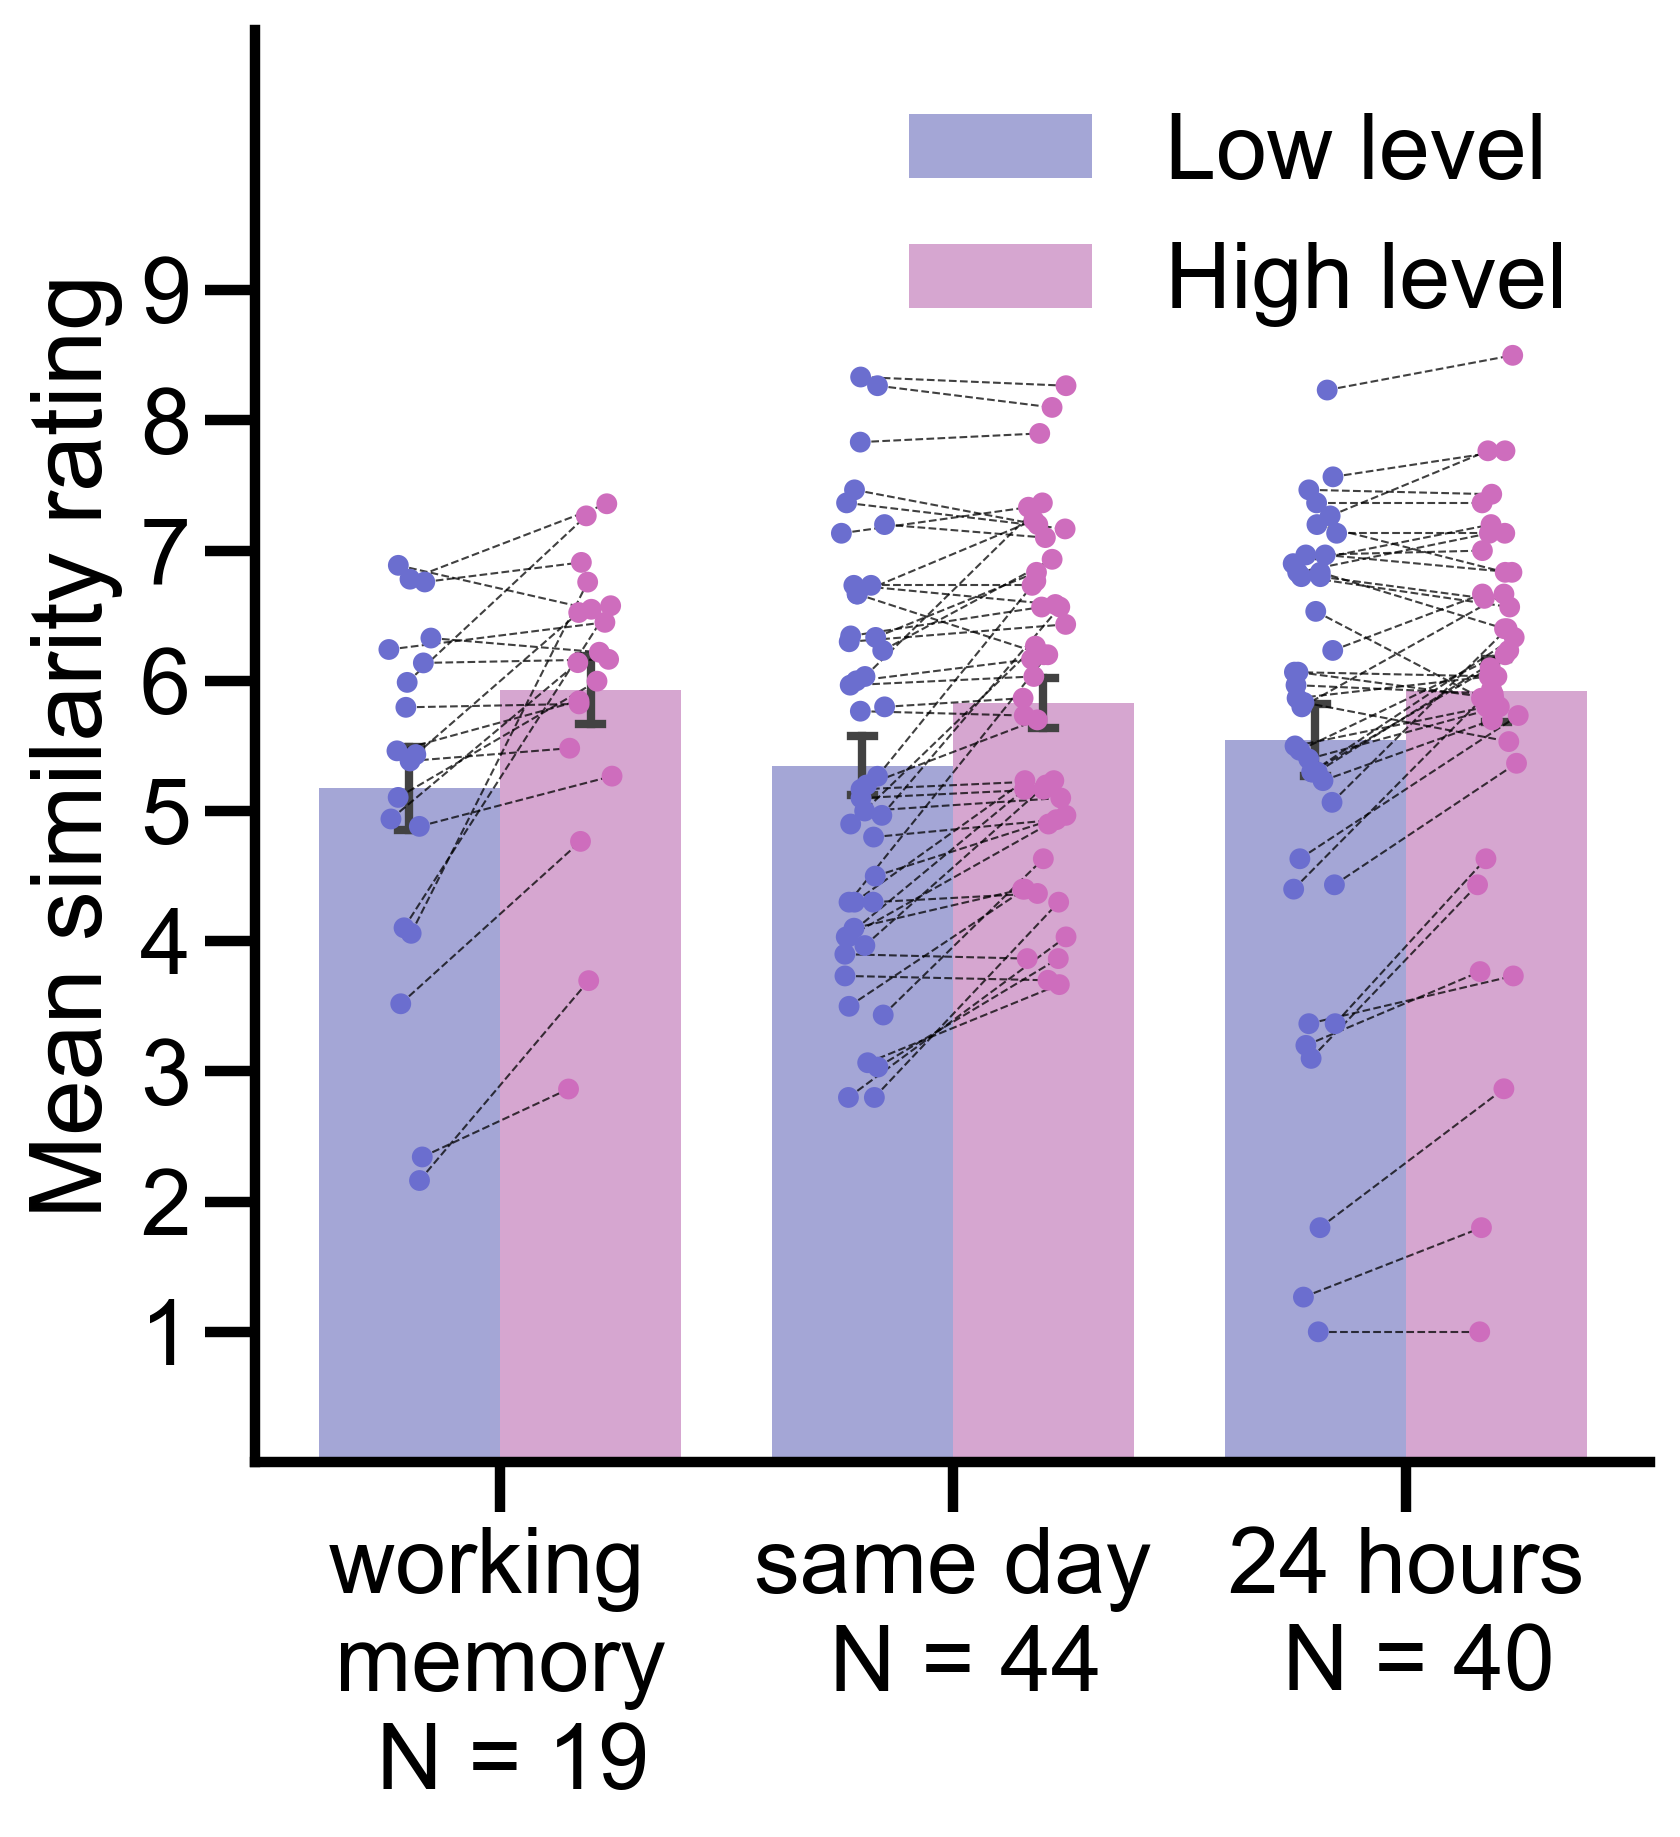

In [1064]:
my_order = ['low_level_rating','high_level_rating']

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6.2),gridspec_kw = {'wspace':0.2, 'hspace':0})
# Hide the right and top spines
axes.spines[['right', 'top']].set_visible(False)
bar = sns.barplot(data =rating_df, x='time_gap',y='value',hue='layer',ax=axes,palette=[sns.color_palette()[3],sns.color_palette()[-1]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'],errorbar='se',capsize=.05,errwidth=2,)
stripplot = sns.stripplot(data =rating_df, x='time_gap',y='value',hue='layer',ax=axes,dodge=True,palette=[sns.color_palette()[2],sns.color_palette()[-2]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'])
# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
add_connecting_lines_to_stripplot(stripplot,axes)
axes.set_xlabel('')
axes.set_xticklabels(labels=[f'working \nmemory\n N = {n_working_memory}',f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}'])
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles[2:],['Low level','High level'],loc='upper right',facecolor='none', framealpha=0)
axes.set_ylabel('Mean similarity rating')
axes.set_ylim([0,11])
axes.set_yticks([1,2,3,4,5,6,7,8,9])

fig.patch.set_alpha(0)
fig.savefig(PATH_TO_EXPERIMENT / ('ratings_per_time_gap_'+qualification_method+'.svg'))
fig.savefig(PATH_TO_EXPERIMENT / ('ratings_per_time_gap_'+qualification_method+'.pdf'))
fig.savefig(PATH_TO_EXPERIMENT / ('ratings_per_time_gap_'+qualification_method+'.png'),transparent=True)

# correlations 

In [1065]:
simillarity_df = pd.DataFrame([])
for cat in ['badlands','bridge','golf_course','highway','mountain','playground']:
    filename = f'similarity_between_pairs_VGG{cat}.csv'
   
    cur_similarity_df = pd.read_csv(PATH_TO_LONG_TERM_MEMORY/filename)
    simillarity_df = pd.concat([simillarity_df,cur_similarity_df])


simillarity_df['image1'] = simillarity_df['image1'].str.replace('.pkl','.jpg')
simillarity_df['image2'] = simillarity_df['image2'].str.replace('.pkl','.jpg')


# sort the values in each row
temp1 = simillarity_df[['image1', 'image2']].apply(lambda x: sorted(x)[0], axis=1)
temp2 = simillarity_df[['image1', 'image2']].apply(lambda x: sorted(x)[1], axis=1)
simillarity_df['image1']=temp1
simillarity_df['image2']=temp2


temp1 = df_long_format_all_time_gaps[['image1', 'image2']].apply(lambda x: sorted(x)[0], axis=1)
temp2 = df_long_format_all_time_gaps[['image1', 'image2']].apply(lambda x: sorted(x)[1], axis=1)
df_long_format_all_time_gaps['image1']=temp1
df_long_format_all_time_gaps['image2']=temp2


all_subjects_test_df=pd.merge(simillarity_df, df_long_format_all_time_gaps, on=['image1', 'image2'],how='right')


#all_subjects_test_df = all_subjects_test_df.rename(columns={"test_test_response.corr": "corr", "bar_2.response": "bar_2"})
all_subjects_test_df['mean_sim']=all_subjects_test_df[[col for col in all_subjects_test_df.columns if 'level_' in col]].mean(axis=1)
all_subjects_test_df['mean_sim_0_6']=all_subjects_test_df[['level_0','level_6']].mean(axis=1)

In [1066]:
all_subjects_test_df

image1               image2   level_0   level_1   level_2   level_3   level_4   level_5   level_6 model    category1    category2  Unnamed: 0  distractor_level correct test_key_resp.keys  correct_numeric  test_key_resp.rt  trials_2.thisRepN  trials_2.thisTrialN  trials_2.thisN  trials_2.thisIndex  trials_2.ran    rating         subject        time_gap  Age Gender               target        selected_dist    category          workID       background_0      background_1         background_2         background_3        background_4        background_5  target_index  slider_part2.rt  time_gap_pilot_24_hours  time_gap_pilot_same_day  time_gap_working_memory  mean_sim  mean_sim_0_6
0          highway_122.jpg      highway_209.jpg  0.270972  0.178226  0.125231  0.095615  0.157327  0.590345  0.712342   VGG      highway      highway           0               1.0   right              right              1.0            5.9214                0.0                  0.0             0.0                 0.0           1.0  8.000000  A17K1CHOI773VZ  pilot_same_day   34      M      highway_209.jpg      highway_122.jpg     highway             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN                    False                     True                    False  0.304294      0.491657
1            bridge_17.jpg       bridge_172.jpg  0.511052  0.333230  0.215984  0.126730  0.054675  0.164255  0.137697   VGG       bridge       bridge           1               0.0    left               left              1.0            3.3594                0.0                  1.0             1.0                 1.0           1.0  2.000000  A17K1CHOI773VZ  pilot_same_day   34      M       bridge_172.jpg        bridge_17.jpg      bridge             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN                    False                     True                    False  0.220518      0.324374
2         badlands_113.jpg     badlands_203.jpg  0.453793  0.356467  0.284037  0.280624  0.395984  0.785356  0.853390   VGG     badlands     badlands           2               1.0    left               left              1.0            7.6472                0.0                  2.0             2.0                 2.0           1.0  7.000000  A17K1CHOI773VZ  pilot_same_day   34      M     badlands_113.jpg     badlands_203.jpg    badlands             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN                    False                     True                    False  0.487093      0.653591
3       playground_205.jpg   playground_219.jpg  0.329943  0.284396  0.176942  0.096481  0.077159  0.381301  0.605077   VGG   playground   playground           3               1.0   right              right              1.0            3.5539                0.0                  3.0             3.0                 3.0           1.0  5.000000  A17K1CHOI773VZ  pilot_same_day   34      M   playground_219.jpg   playground_205.jpg  playground             NaN                NaN               NaN                  NaN                  NaN                 NaN                 NaN           NaN              NaN                    False                     True                    False  0.278757      0.467510
4       golf_course_26.jpg  golf_course_331.jpg  0.405576  0.322834  0.252274  0.286320  0.389074  0.710798  0.733175   VGG  golf_course  golf_course           4               1.0   right               left              0.0            5.7232                0.0                  4.0             4.0                 4.0           1.0  6.000000  A17K1CHOI773VZ  pilot_same_day   34      M  golf_course_331.jpg   golf_course_26.jpg        golf             NaN                NaN               NaN   

In [1073]:
df_24_hours = all_subjects_test_df[all_subjects_test_df['time_gap'] == 'pilot_24_hours']
df_same_day = all_subjects_test_df[all_subjects_test_df['time_gap'] == 'pilot_same_day']
df_working_memory = all_subjects_test_df[all_subjects_test_df['time_gap'] == 'working_memory']

df_24_hours_grouped = df_24_hours.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})
df_same_day_grouped = df_same_day.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})
df_working_memory_grouped = df_working_memory.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})

correlations_df_24_hours_grouped=df_24_hours.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})
correlations_df_same_day_grouped=df_same_day.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})
correlations_df_working_memory_grouped = df_working_memory.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})

In [1068]:
#we are not sure why this is here .... 
df_24_hours_grouped = df_24_hours_grouped.drop(('bridge_17.jpg','bridge_172.jpg'))
df_same_day_grouped = df_same_day_grouped.drop(('bridge_17.jpg','bridge_172.jpg'))

In [1074]:
grouped_df = all_subjects_test_df.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})
grouped_df_corr =all_subjects_test_df.groupby(['image1','image2']).aggregate({'rating':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','correct_numeric':'mean'})

In [1070]:
grouped_df = grouped_df.drop(('bridge_17.jpg','bridge_172.jpg'))

rho=-0.152
p=0.096
rho=0.551
p=0.000
rho=-0.306
p=0.001


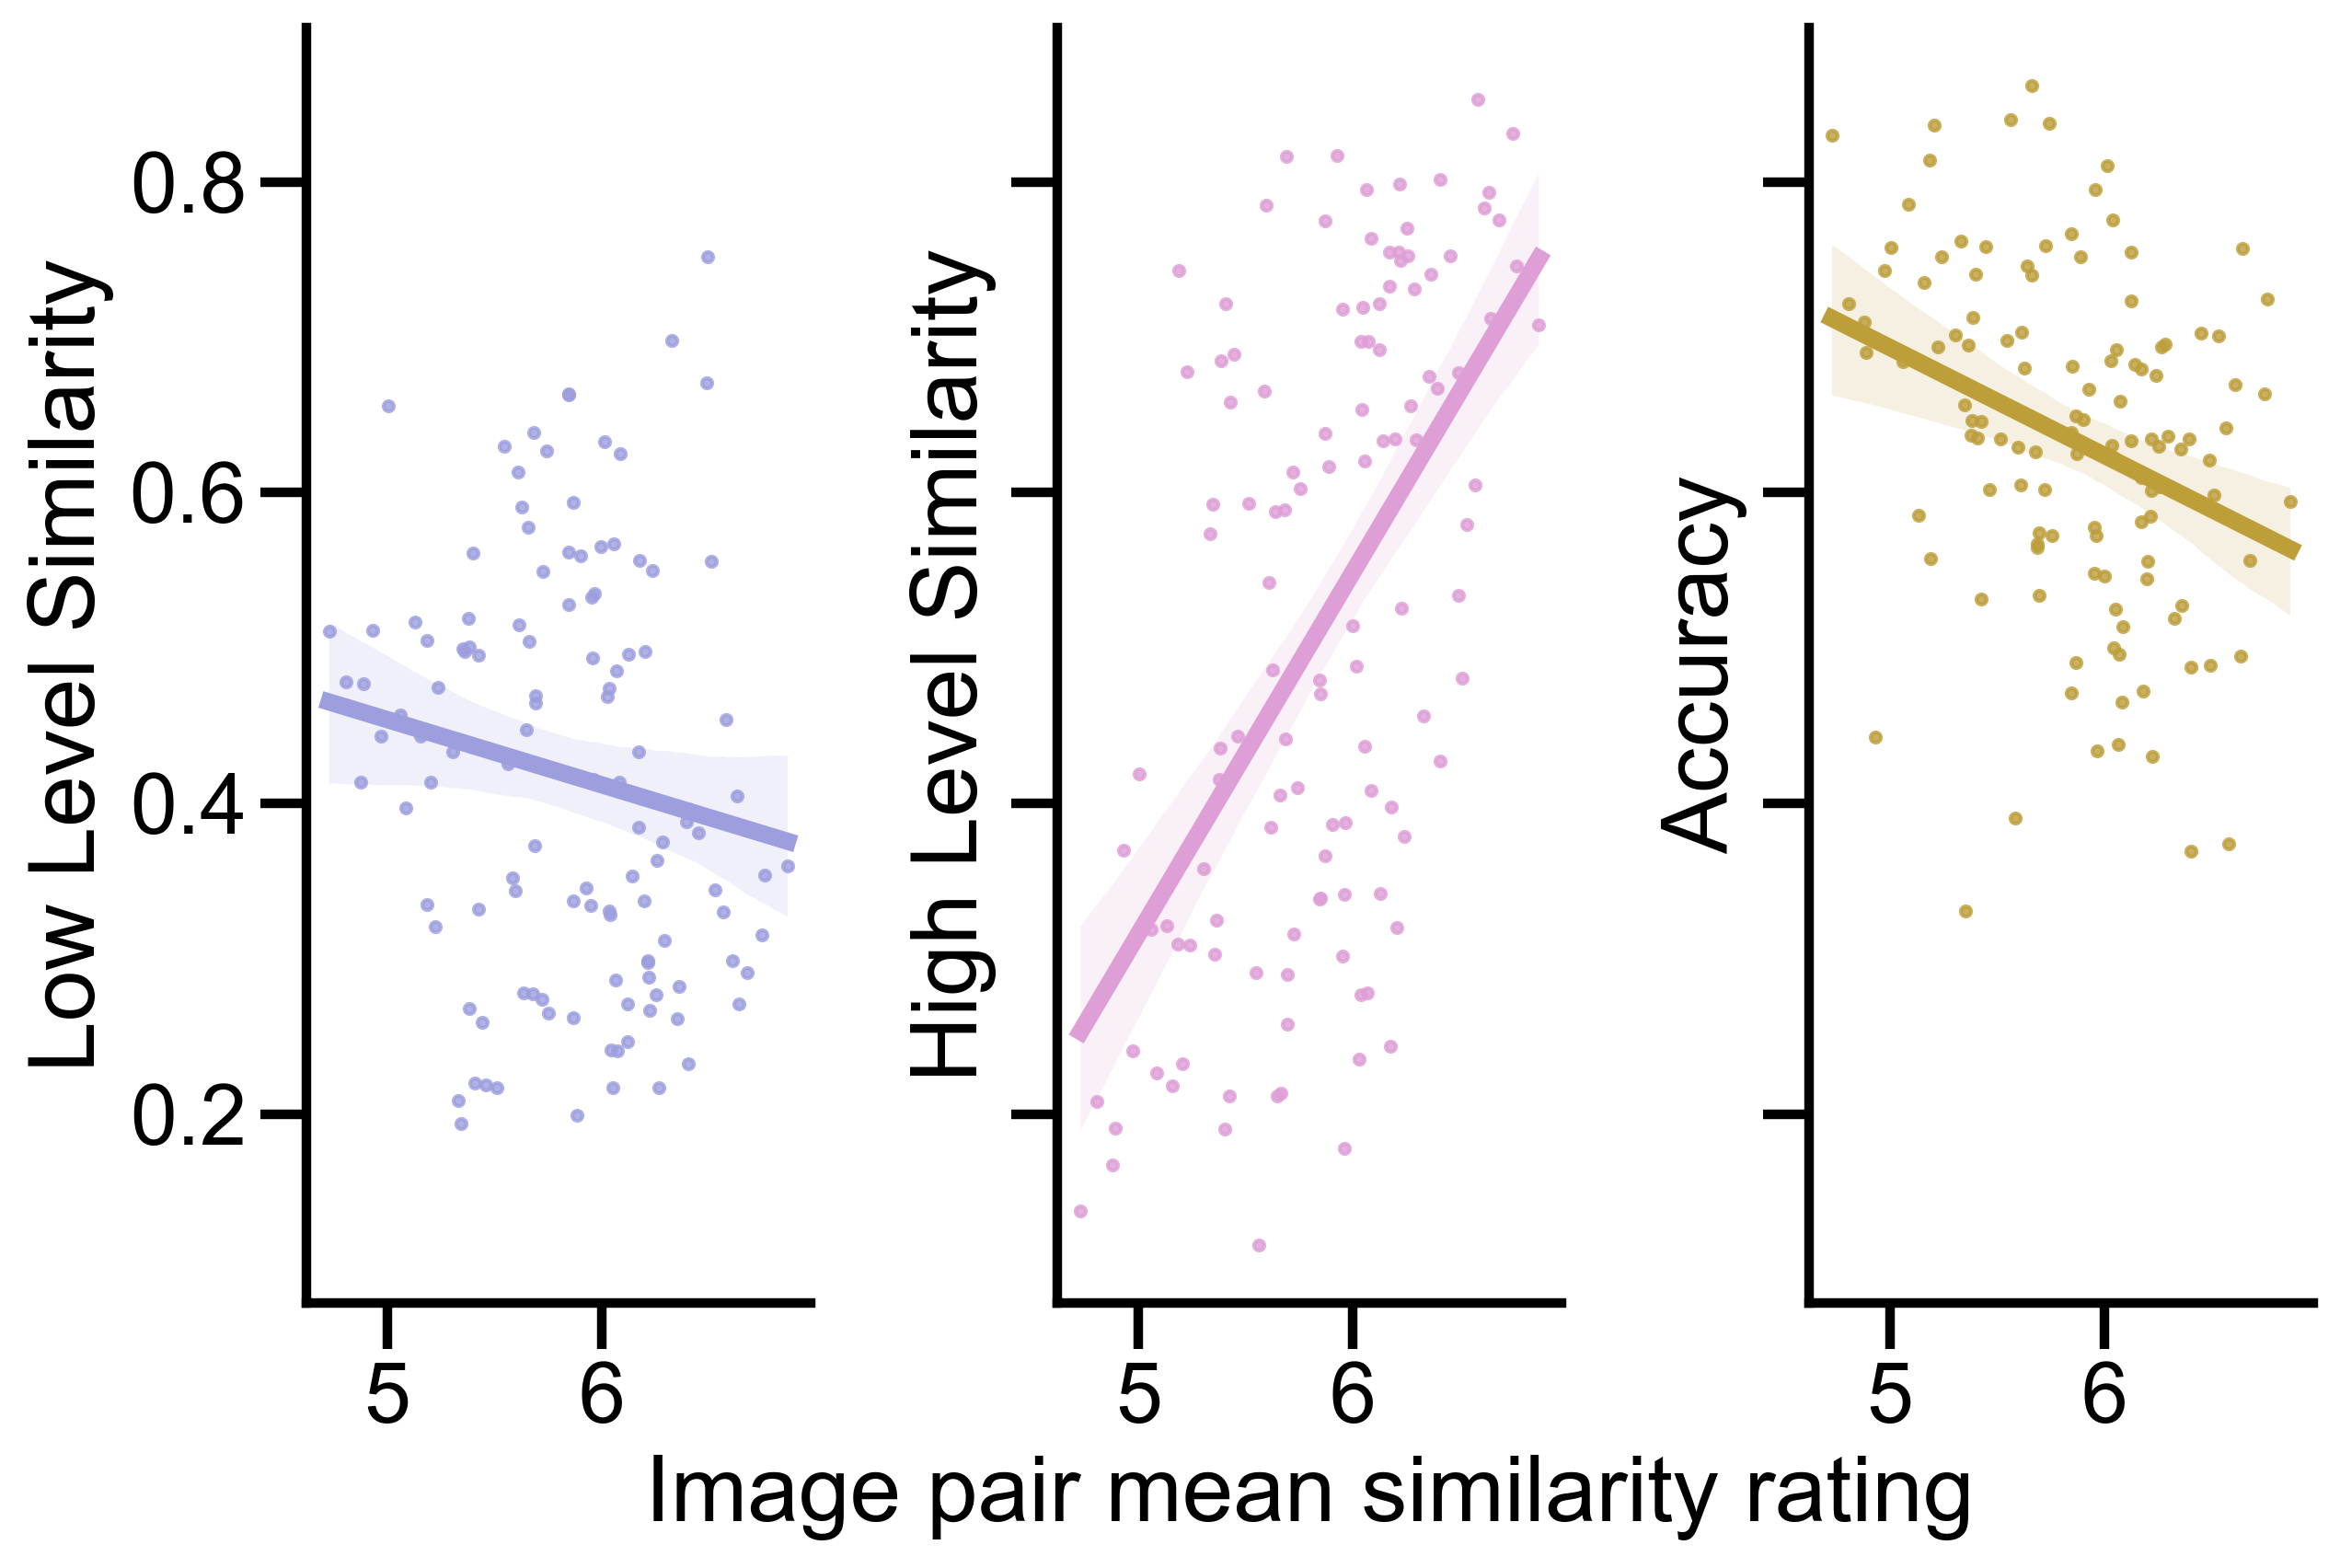

In [1075]:
fig,axes=plt.subplots(nrows=1,ncols=3,sharex = True,sharey = True,figsize=(9,6.2))
axes=axes.ravel()
# low level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=grouped_df_corr['rating'], y=grouped_df_corr['level_0'])
print(f'rho={r_value_24:.3f}\np={p_value_24:.3f}')
sns.regplot(data=grouped_df,x='rating',y='level_0',ax=axes[0],color = sns.color_palette()[3],scatter_kws={'s':7})
axes[0].spines[['right', 'top']].set_visible(False)
axes[0].set_xlabel('')
axes[0].set_ylabel('Low Level Similarity')



# high level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=grouped_df_corr['rating'], y=grouped_df_corr['level_6'])
print(f'rho={r_value_24:.3f}\np={p_value_24:.3f}')
sns.regplot(data=grouped_df,x='rating',y='level_6',ax=axes[1],color = sns.color_palette()[-1],scatter_kws={'s':7})
axes[1].spines[['right', 'top']].set_visible(False)
axes[1].set_xlabel('Image pair mean similarity rating')
axes[1].set_ylabel('High Level Similarity')



# corr
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=grouped_df_corr['rating'], y=grouped_df_corr['correct_numeric'])
print(f'rho={r_value_24:.3f}\np={p_value_24:.3f}')
sns.regplot(data=grouped_df,x='rating',y='correct_numeric',ax=axes[2],color = sns.color_palette()[9],scatter_kws={'s':7})
axes[2].spines[['right', 'top']].set_visible(False)
axes[2].set_xlabel('')
axes[2].set_ylabel('Accuracy')

fig.tight_layout()

fig.patch.set_alpha(0)

pdf_name = 'correlations_to_similarity_and_accuracy.pdf'
png_name = 'correlations_to_similarity_and_accuracy.png'
plt.savefig(PATH_TO_PROJECT/path.Path('experiment 1/figures and outputs') / pdf_name,format='pdf',bbox_inches='tight')
plt.savefig(PATH_TO_PROJECT/path.Path('experiment 1/figures and outputs') / png_name,format='png',bbox_inches='tight',transparent=True)

rho=-0.110
p=0.234
rho=-0.135
p=0.143
rho=-0.162
p=0.078
rho=0.462
p=0.000
rho=0.511
p=0.000
rho=0.516
p=0.000
rho=-0.249
p=0.006
rho=-0.204
p=0.025
rho=-0.244
p=0.007


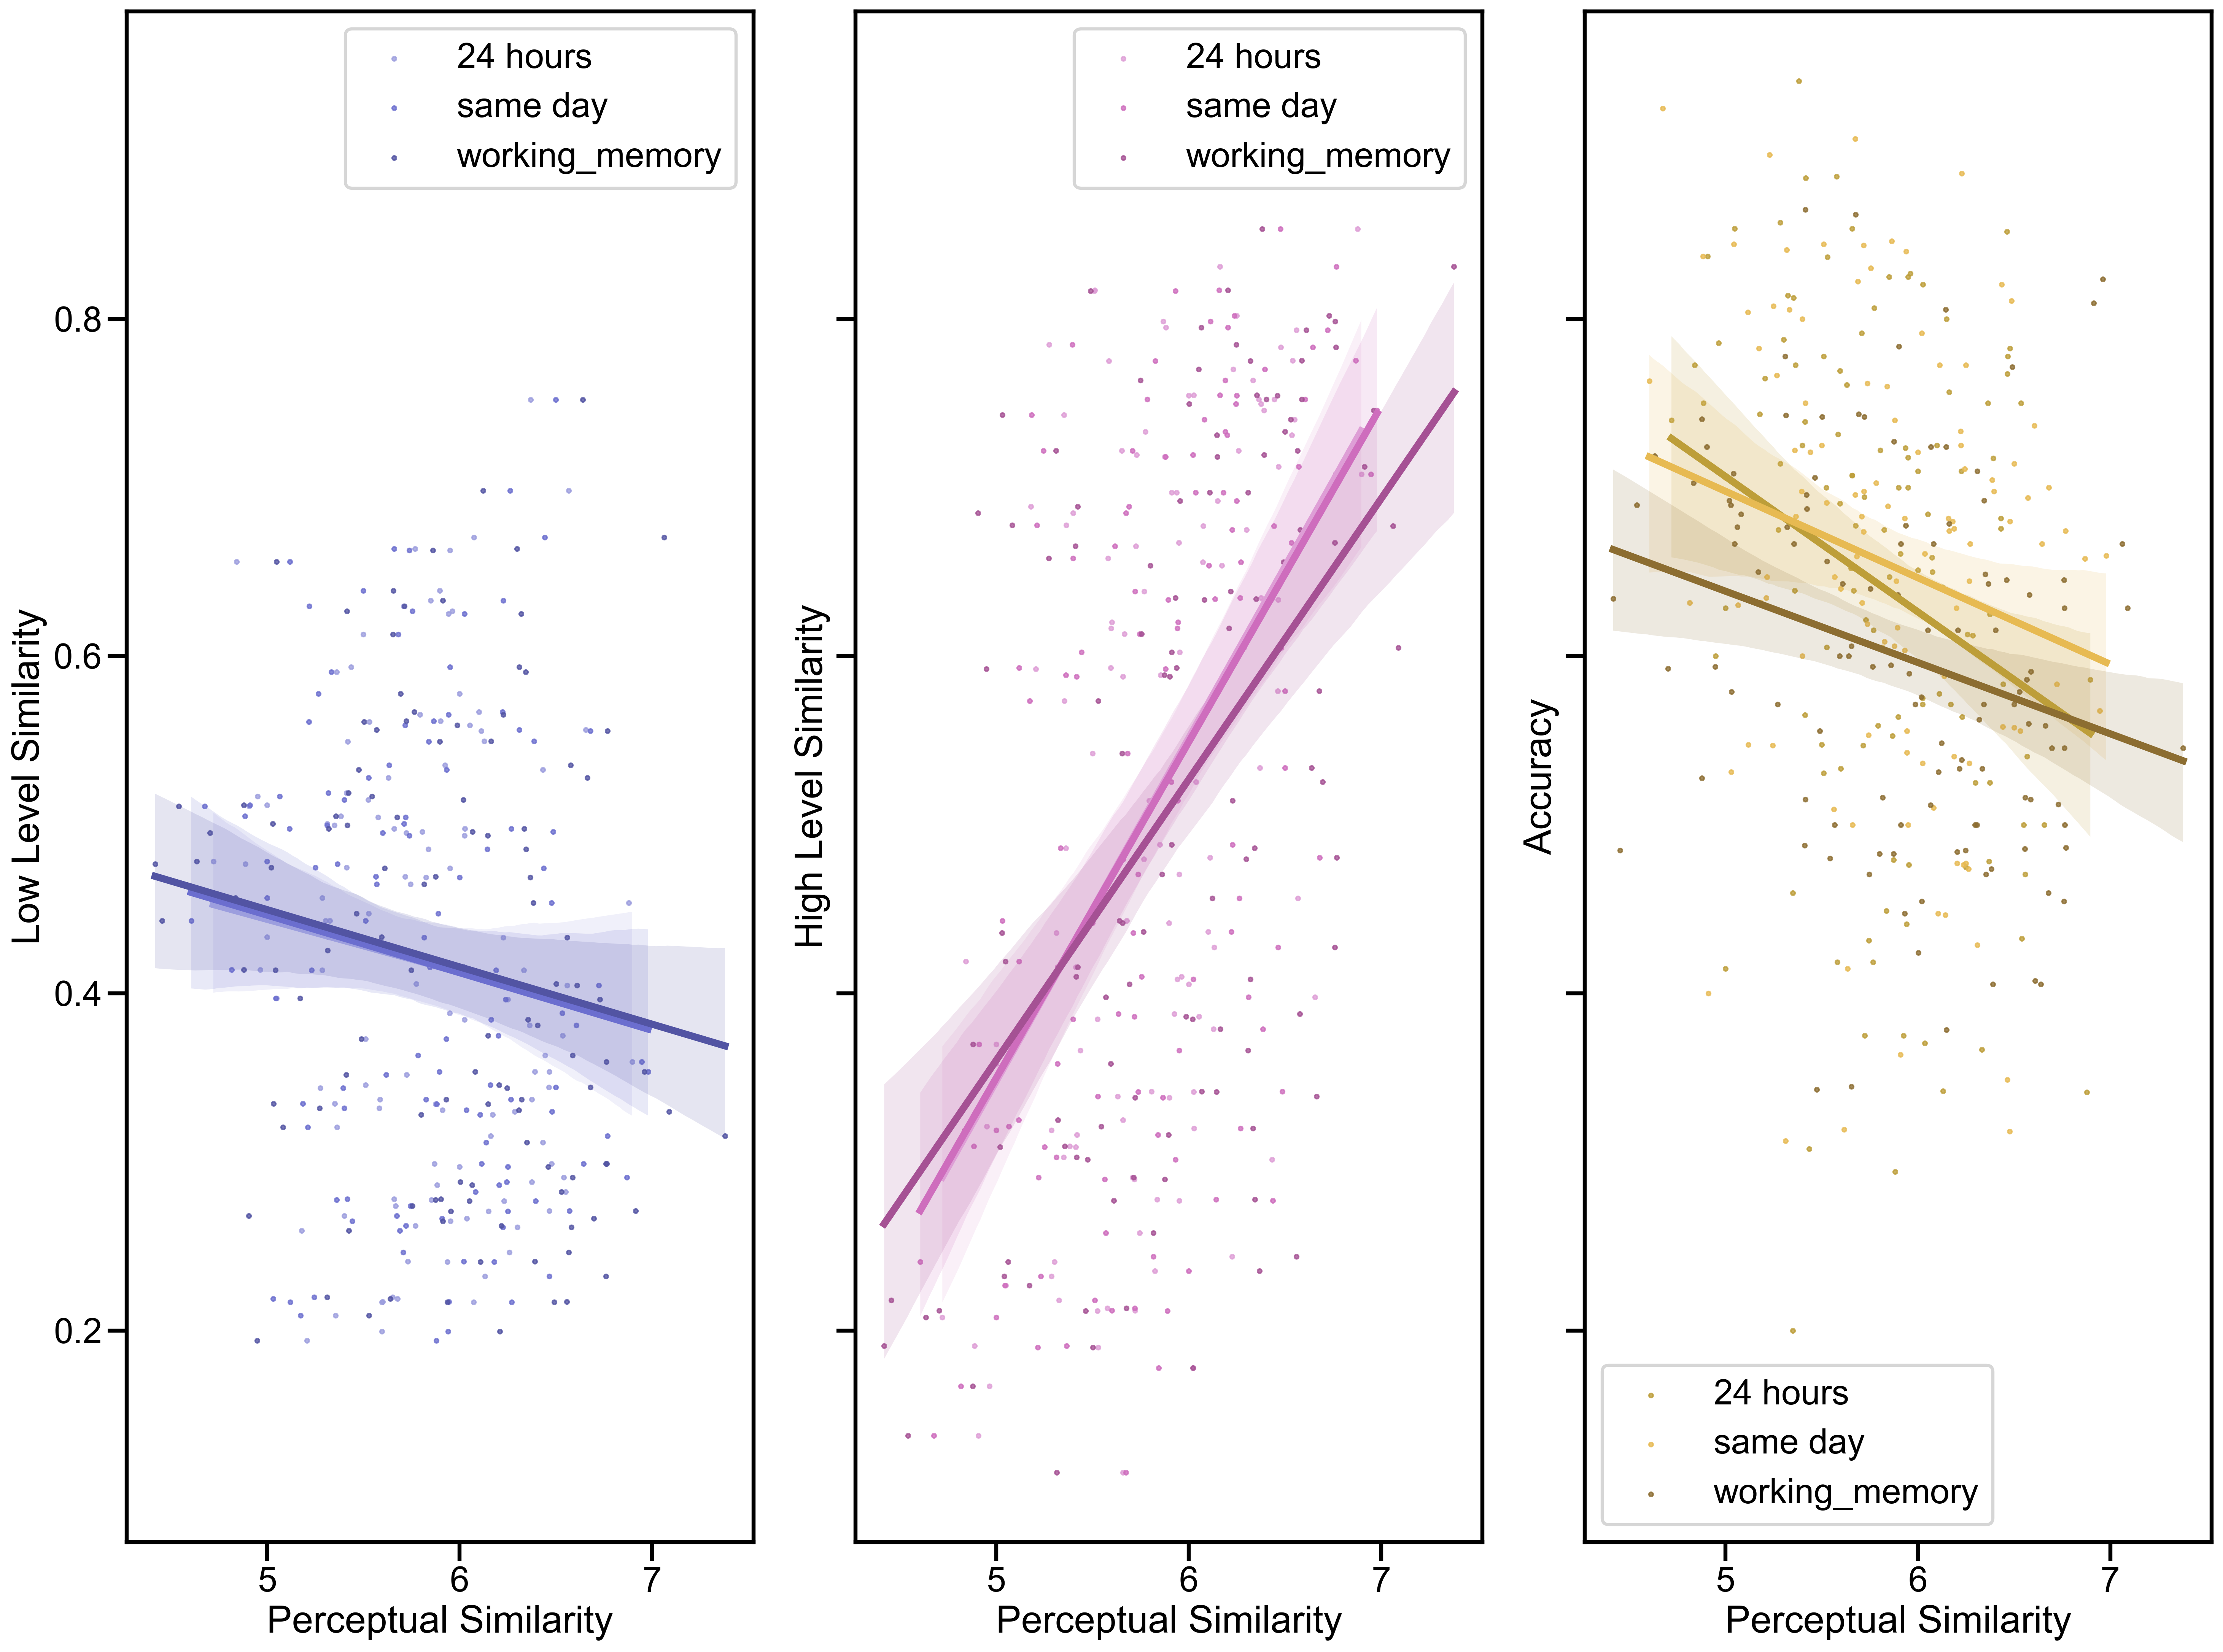

In [1076]:
fig,axes=plt.subplots(nrows=1,ncols=3,sharex = True,sharey = True,figsize=(20,15))
axes=axes.ravel()
# low level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['rating'], y=correlations_df_24_hours_grouped['level_0'])
print(f'rho={r_value_24:.3f}\np={p_value_24:.3f}')
sns.regplot(data=df_24_hours_grouped,x='rating',y='level_0',ax=axes[0],color = sns.color_palette()[3],label = f'24 hours',scatter_kws={'s':7})


slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['rating'], y=correlations_df_same_day_grouped['level_0'])
print(f'rho={r_value_day:.3f}\np={p_value_day:.3f}')
sns.regplot(data=df_same_day_grouped,x='rating',y='level_0',ax=axes[0],color = sns.color_palette()[2],label = f'same day',scatter_kws={'s':7})

slope_working, intercept_working, r_value_working, p_value_working, std_err_working = stats.linregress(x=correlations_df_working_memory_grouped['rating'], y=correlations_df_working_memory_grouped['level_0'])
print(f'rho={r_value_working:.3f}\np={p_value_working:.3f}')
sns.regplot(data=df_working_memory_grouped,x='rating',y='level_0',ax=axes[0],color = sns.color_palette()[1],label = f'working_memory',scatter_kws={'s':7})


axes[0].set_xlabel('Perceptual Similarity')
axes[0].set_ylabel('Low Level Similarity')
axes[0].legend()


# high level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['rating'], y=correlations_df_24_hours_grouped['level_6'])
print(f'rho={r_value_24:.3f}\np={p_value_24:.3f}')
sns.regplot(data=df_24_hours_grouped,x='rating',y='level_6',ax=axes[1],color = sns.color_palette()[-1],label = f'24 hours',scatter_kws={'s':7})
#axes[1].set_title(f'perceptual similarity\nand high level similarity')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['rating'], y=correlations_df_same_day_grouped['level_6'])
print(f'rho={r_value_day:.3f}\np={p_value_day:.3f}')
sns.regplot(data=df_same_day_grouped,x='rating',y='level_6',ax=axes[1],color = sns.color_palette()[-2],label = f'same day',scatter_kws={'s':7})

slope_working, intercept_working, r_value_working, p_value_working, std_err_working = stats.linregress(x=correlations_df_working_memory_grouped['rating'], y=correlations_df_working_memory_grouped['level_6'])
print(f'rho={r_value_working:.3f}\np={p_value_working:.3f}')
sns.regplot(data=df_working_memory_grouped,x='rating',y='level_6',ax=axes[1],color = sns.color_palette()[-3],label = f'working_memory',scatter_kws={'s':7})

axes[1].set_xlabel('Perceptual Similarity')
axes[1].set_ylabel('High Level Similarity')
axes[1].legend()



# corr
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['rating'], y=correlations_df_24_hours_grouped['correct_numeric'])
print(f'rho={r_value_24:.3f}\np={p_value_24:.3f}')
sns.regplot(data=df_24_hours_grouped,x='rating',y='correct_numeric',ax=axes[2],color = sns.color_palette()[9],label = f'24 hours',scatter_kws={'s':7})
#axes[3].set_title(f'perceptual similarity\nand accuracy')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['rating'], y=correlations_df_same_day_grouped['correct_numeric'])
print(f'rho={r_value_day:.3f}\np={p_value_day:.3f}')
sns.regplot(data=df_same_day_grouped,x='rating',y='correct_numeric',ax=axes[2],color = sns.color_palette()[10],label = f'same day',scatter_kws={'s':7})

slope_working, intercept_working, r_value_working, p_value_working, std_err_working = stats.linregress(x=correlations_df_working_memory_grouped['rating'], y=correlations_df_working_memory_grouped['correct_numeric'])
print(f'rho={r_value_working:.3f}\np={p_value_working:.3f}')
sns.regplot(data=df_working_memory_grouped,x='rating',y='correct_numeric',ax=axes[2],color = sns.color_palette()[8],label = f'working_memory',scatter_kws={'s':7})

axes[2].set_xlabel('Perceptual Similarity')
axes[2].set_ylabel('Accuracy')
axes[2].legend()
fig.tight_layout()

fig.patch.set_alpha(0)

pdf_name = 'correlations_to_similarity_and_accuracy.pdf'
png_name = 'correlations_to_similarity_and_accuracy.png'
plt.savefig(PATH_TO_PROJECT/path.Path('experiment 1/figures and outputs') / pdf_name,format='pdf',bbox_inches='tight')
plt.savefig(PATH_TO_PROJECT/path.Path('experiment 1/figures and outputs') / png_name,format='png',bbox_inches='tight',transparent=True)